# **`Logistic Regression Model`**

## <span style="color:MediumBlue">Lead Scoring Case Study</span>

### Problem Statement:

An education company named **`X Education`** sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.



### Business Goal:

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


In [1]:
# Importing required library

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder


# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

#Increasing the columns views limit
pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

## <span style="color:MediumBlue">Reading and Understanding the Data</span>

In [2]:
# Importing lead dataset
leads = pd.read_csv("Leads.csv")
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0         0.00   
1  Organic Search           No          No          0         5.00   
2  Direct Traffic           No          No          1         2.00   
3  Direct Traffic           No          No          0         1.00   
4          Google           No          No          1         2.00   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                  0.00  Page Visited on Website   
1                          674                  2.50             Email Opened   
2                         1532                  2.00             Email Opened   
3                          305                  1.00              Unreachable   
4                         1428                  1.00        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [3]:
#Checking the shape of dataframe
leads.shape

(9240, 37)

In [4]:
#Checking datatype 
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# describing the columns of dataframe
leads.describe()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
count      9240.00    9240.00      9103.00                      9240.00   
mean     617188.44       0.39         3.45                       487.70   
std       23406.00       0.49         4.85                       548.02   
min      579533.00       0.00         0.00                         0.00   
25%      596484.50       0.00         1.00                        12.00   
50%      615479.00       0.00         3.00                       248.00   
75%      637387.25       1.00         5.00                       936.00   
max      660737.00       1.00       251.00                      2272.00   

       Page Views Per Visit  Asymmetrique Activity Score  \
count               9103.00                      5022.00   
mean                   2.36                        14.31   
std                    2.16                         1.39   
min                    0.00                         7.00   
25%                    1.00                        14.00   
50%                    2.00                        14.00   
75%                    3.00                        15.00   
max                   55.00                        18.00   

       Asymmetrique Profile Score  
count                     5022.00  
mean                        16.34  
std                          1.81  
min                         11.00  
25%                         15.00  
50%                         16.00  
75%                         18.00  
max                         20.00

## <span style="color:MediumBlue">Data Cleaning and Preparation</span>

- Many Columns have 'Select' values because the customer did not select any option from the dropdown list, So we will convert  'Select' values to null values.

In [6]:
# Converting 'Select' values to NaN.
leads= leads.replace('Select', np.nan)

In [7]:
# Finding the null percentage
round(leads.isnull().sum().sort_values(ascending=False)/len(leads.index),2)*100

How did you hear about X Education              78.00
Lead Profile                                    74.00
Lead Quality                                    52.00
Asymmetrique Profile Score                      46.00
Asymmetrique Activity Score                     46.00
Asymmetrique Activity Index                     46.00
Asymmetrique Profile Index                      46.00
City                                            40.00
Specialization                                  37.00
Tags                                            36.00
What matters most to you in choosing a course   29.00
What is your current occupation                 29.00
Country                                         27.00
Page Views Per Visit                             1.00
TotalVisits                                      1.00
Last Activity                                    1.00
Lead Source                                      0.00
Receive More Updates About Our Courses           0.00
I agree to pay the amount th

In [8]:
# dropping the columns with missing values greater than 40% .
leads=leads.drop(columns=['How did you hear about X Education',
'Lead Profile',
'Lead Quality',
'Asymmetrique Profile Score',
'Asymmetrique Activity Score',
'Asymmetrique Activity Index',
'Asymmetrique Profile Index',])

In [9]:
# Checking the null percentage
round(leads.isnull().sum().sort_values(ascending=False)/len(leads.index),2)*100

City                                            40.00
Specialization                                  37.00
Tags                                            36.00
What matters most to you in choosing a course   29.00
What is your current occupation                 29.00
Country                                         27.00
Page Views Per Visit                             1.00
TotalVisits                                      1.00
Last Activity                                    1.00
Lead Source                                      0.00
Through Recommendations                          0.00
Receive More Updates About Our Courses           0.00
Prospect ID                                      0.00
Newspaper                                        0.00
Update me on Supply Chain Content                0.00
Get updates on DM Content                        0.00
I agree to pay the amount through cheque         0.00
A free copy of Mastering The Interview           0.00
Digital Advertisement       

**Observations**
There are six columns that still have high % of null values:
- City                                            : 40.00%
- Specialization                                  : 37.00%
- Tags                                            : 36.00%
- What matters most to you in choosing a course   : 29.00%
- What is your current occupation                 : 29.00%
- Country                                         : 27.00%

In [10]:
#checking value counts of "City" column
leads.City.value_counts(normalize = True, dropna = False) * 100

NaN                           39.71
Mumbai                        34.87
Thane & Outskirts              8.14
Other Cities                   7.42
Other Cities of Maharashtra    4.95
Other Metro Cities             4.11
Tier II Cities                 0.80
Name: City, dtype: float64

- The distribution of the data is very heavily skewed,Since most values are 'Mumbai' It is safe to drop this column.

In [11]:
# Dropping "City" Column
leads.drop('City', axis = 1, inplace = True)

In [12]:
#checking value counts of "Specialization" column
leads['Specialization'].value_counts(normalize = True, dropna = False) * 100

NaN                                 36.58
Finance Management                  10.56
Human Resource Management            9.18
Marketing Management                 9.07
Operations Management                5.44
Business Administration              4.36
IT Projects Management               3.96
Supply Chain Management              3.78
Banking, Investment And Insurance    3.66
Travel and Tourism                   2.20
Media and Advertising                2.20
International Business               1.93
Healthcare Management                1.72
Hospitality Management               1.23
E-COMMERCE                           1.21
Retail Management                    1.08
Rural and Agribusiness               0.79
E-Business                           0.62
Services Excellence                  0.43
Name: Specialization, dtype: float64

- There is 36% missing values present in the Specialization column,Some of the lead here may be student or their Specialization may not be present in the drop down list to we will create a Category 'Others' and replace all null with it

In [13]:
# Creating a separate category called 'Others' for this 
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

In [14]:
#checking value % of "Country" column
leads.Country.value_counts(normalize = True, dropna = False) * 100

India                  70.26
NaN                    26.63
United States           0.75
United Arab Emirates    0.57
Singapore               0.26
Saudi Arabia            0.23
United Kingdom          0.16
Australia               0.14
Qatar                   0.11
Bahrain                 0.08
Hong Kong               0.08
Oman                    0.06
France                  0.06
unknown                 0.05
Kuwait                  0.04
South Africa            0.04
Canada                  0.04
Nigeria                 0.04
Germany                 0.04
Sweden                  0.03
Philippines             0.02
Uganda                  0.02
Italy                   0.02
Bangladesh              0.02
Netherlands             0.02
Asia/Pacific Region     0.02
China                   0.02
Belgium                 0.02
Ghana                   0.02
Kenya                   0.01
Sri Lanka               0.01
Tanzania                0.01
Malaysia                0.01
Liberia                 0.01
Switzerland   

- The distribution of the data is very heavily skewed, with India + null values = 97% of the total values. Hence it is safe to drop Country column.

In [15]:
#Dropping "Country" Column
leads.drop('Country', axis = 1, inplace = True)

In [16]:
#checking value counts of "What matters most to you in choosing a course" column
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- Again the data is highly skewed as Better Career Prospects and Null covers 100% OF values,So we will drop the column

In [17]:
#Dropping "What matters most to you in choosing a course" Column
leads.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

In [18]:
#checking value counts of "What is your current occupation" column
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [19]:
#checking % of "What is your current occupation" column
leads['What is your current occupation'].value_counts(normalize = True, dropna = False)* 100

Unemployed             60.61
NaN                    29.11
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: What is your current occupation, dtype: float64

- Since 60% of leads are unemployed we can replace null value with Unemployed

In [20]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
leads['What is your current occupation']=leads['What is your current occupation'].replace(np.nan,'Unemployed')

In [21]:
#checking value counts of "Tags" column
leads['Tags'].value_counts(normalize = True, dropna = False)* 100

NaN                                                 36.29
Will revert after reading the email                 22.42
Ringing                                             13.02
Interested in other courses                          5.55
Already a student                                    5.03
Closed by Horizzon                                   3.87
switched off                                         2.60
Busy                                                 2.01
Lost to EINS                                         1.89
Not doing further education                          1.57
Interested  in full time MBA                         1.27
Graduation in progress                               1.20
invalid number                                       0.90
Diploma holder (Not Eligible)                        0.68
wrong number given                                   0.51
opp hangup                                           0.36
number not provided                                  0.29
in touch with 

- Since 36% the highest no of values are null we will drop Tags

In [22]:
# Dropping "Tags" Column
leads.drop('Tags', axis = 1, inplace = True)

In [23]:
# Checking the null percentage after removing the major null values
round(leads.isnull().sum().sort_values(ascending=False)/len(leads.index),2)*100

TotalVisits                                1.00
Page Views Per Visit                       1.00
Last Activity                              1.00
Lead Source                                0.00
Prospect ID                                0.00
Newspaper Article                          0.00
A free copy of Mastering The Interview     0.00
I agree to pay the amount through cheque   0.00
Get updates on DM Content                  0.00
Update me on Supply Chain Content          0.00
Receive More Updates About Our Courses     0.00
Through Recommendations                    0.00
Digital Advertisement                      0.00
Newspaper                                  0.00
X Education Forums                         0.00
Search                                     0.00
Magazine                                   0.00
Lead Number                                0.00
What is your current occupation            0.00
Specialization                             0.00
Total Time Spent on Website             

In [24]:
#we will drop the remaining null values
leads.dropna(inplace = True)

In [25]:
leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content 

- Now we have no missing value in dataset

In [26]:
# Checking the % of rows retained after data cleaning
(len(leads.index)/9240)*100

98.2034632034632

In [27]:
#check for columns with one unique value

leads.describe(include = 'object')

Prospect ID              Lead Origin  \
count                                   9074                     9074   
unique                                  9074                        4   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620  Landing Page Submission   
freq                                       1                     4885   

       Lead Source Do Not Email Do Not Call Last Activity Specialization  \
count         9074         9074        9074          9074           9074   
unique          21            2           2            17             19   
top         Google           No          No  Email Opened         Others   
freq          2868         8358        9072          3432           3282   

       What is your current occupation Search Magazine Newspaper Article  \
count                             9074   9074     9074              9074   
unique                               6      2        1                 2   
top                         Unemployed     No       No                No   
freq                              8159   9060     9074              9072   

       X Education Forums Newspaper Digital Advertisement  \
count                9074      9074                  9074   
unique                  2         2                     2   
top                    No        No                    No   
freq                 9073      9073                  9070   

       Through Recommendations Receive More Updates About Our Courses  \
count                     9074                                   9074   
unique                       2                                      1   
top                         No                                     No   
freq                      9067                                   9074   

       Update me on Supply Chain Content Get updates on DM Content  \
count                               9074                      9074   
unique                                 1                         1   
top                                   No                        No   
freq                                9074                      9074   

       I agree to pay the amount through cheque  \
count                                      9074   
unique                                        1   
top                                          No   
freq                                       9074   

       A free copy of Mastering The Interview Last Notable Activity  
count                                    9074                  9074  
unique                                      2                    16  
top                                        No              Modified  
freq                                     6186                  3267

Below mentioned columns have only one unique value and can be dropped.

- I agree to pay the amount through cheque
- Get updates on DM Content
- Update me on Supply Chain Content
- Receive More Updates About Our Courses
- Magazine


In [28]:
leads_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

leads.drop(leads_drop, axis = 1, inplace = True)

In [29]:
#Dropping some more columns which will add no value to our model
leads.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)

In [30]:
leads.shape

(9074, 18)

### <span style="color:MediumBlue">Checking Categorical columns </span>

In [31]:
leads.select_dtypes(include=['category', 'object']).columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [32]:
#Creating list of all categorical columns
leads_cat = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview']

<Figure size 1600x600 with 0 Axes>

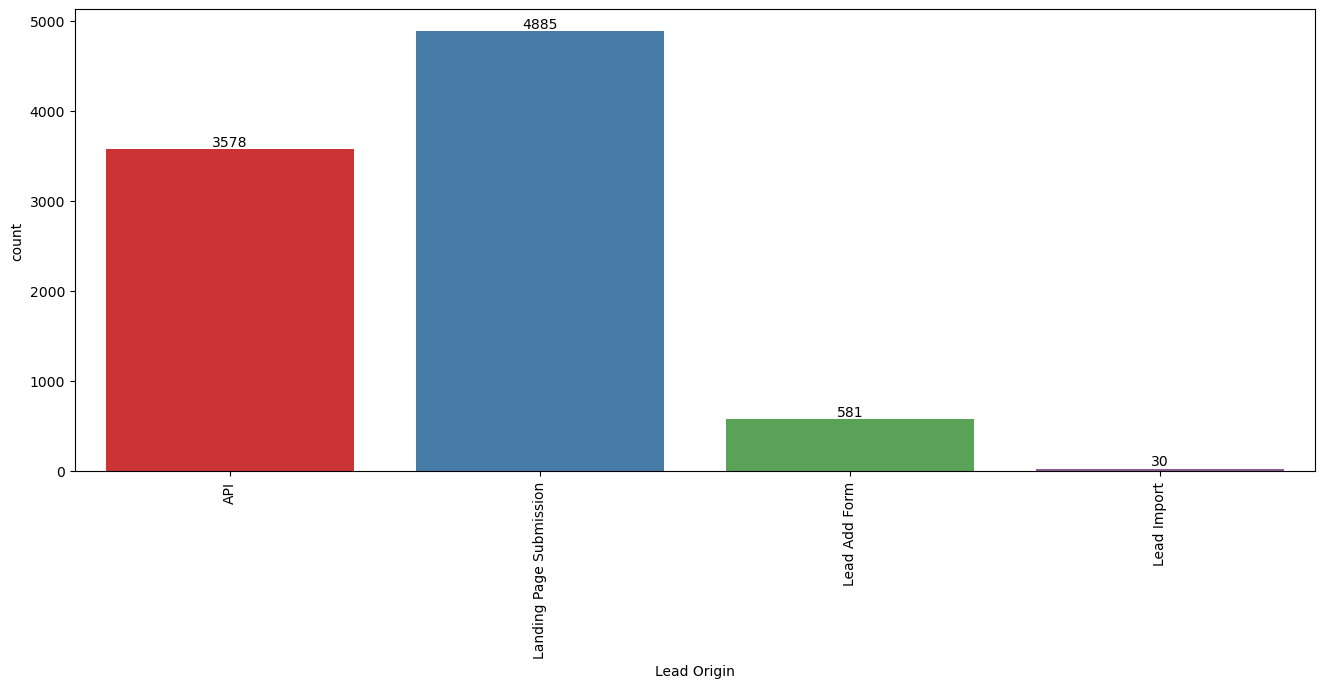

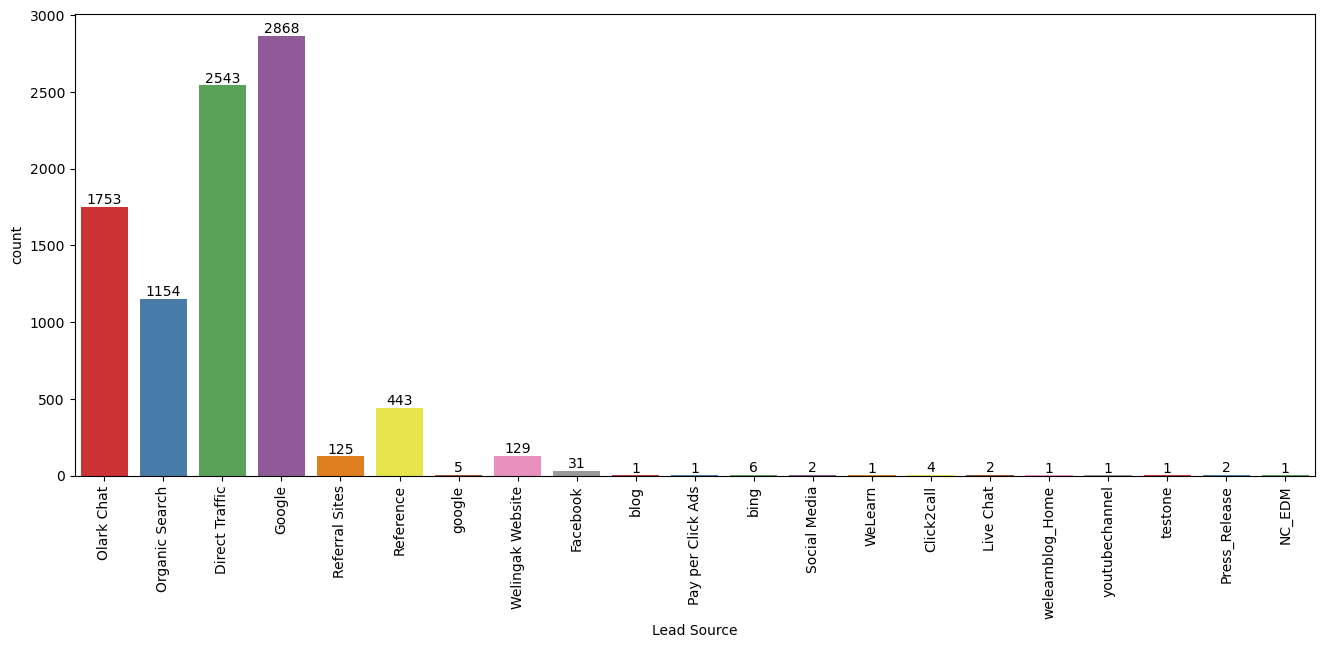

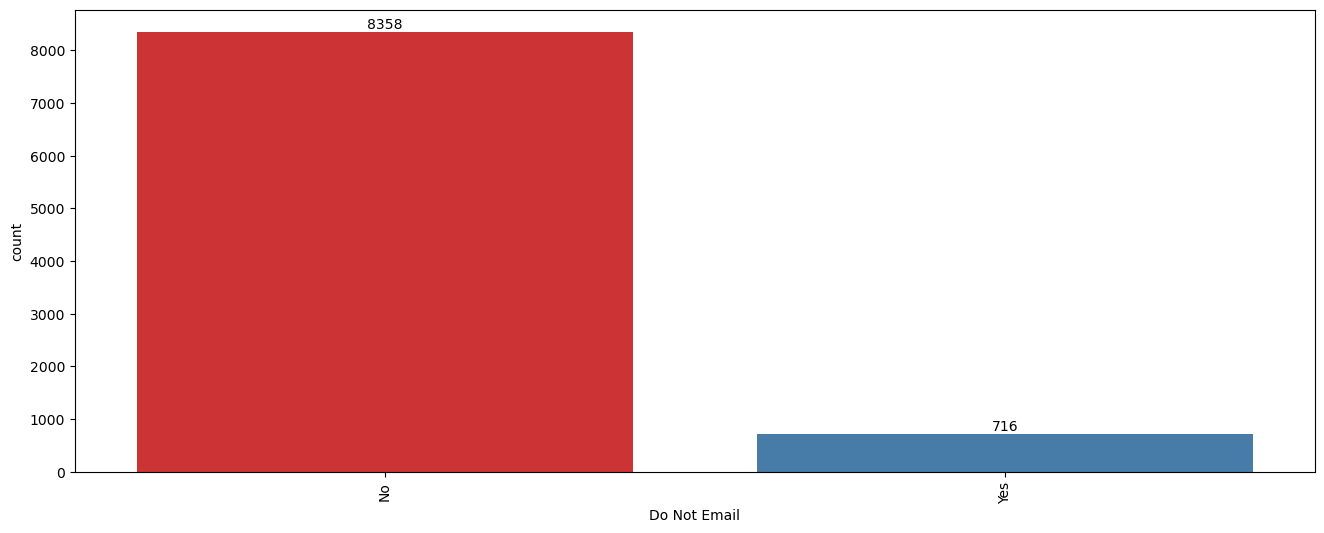

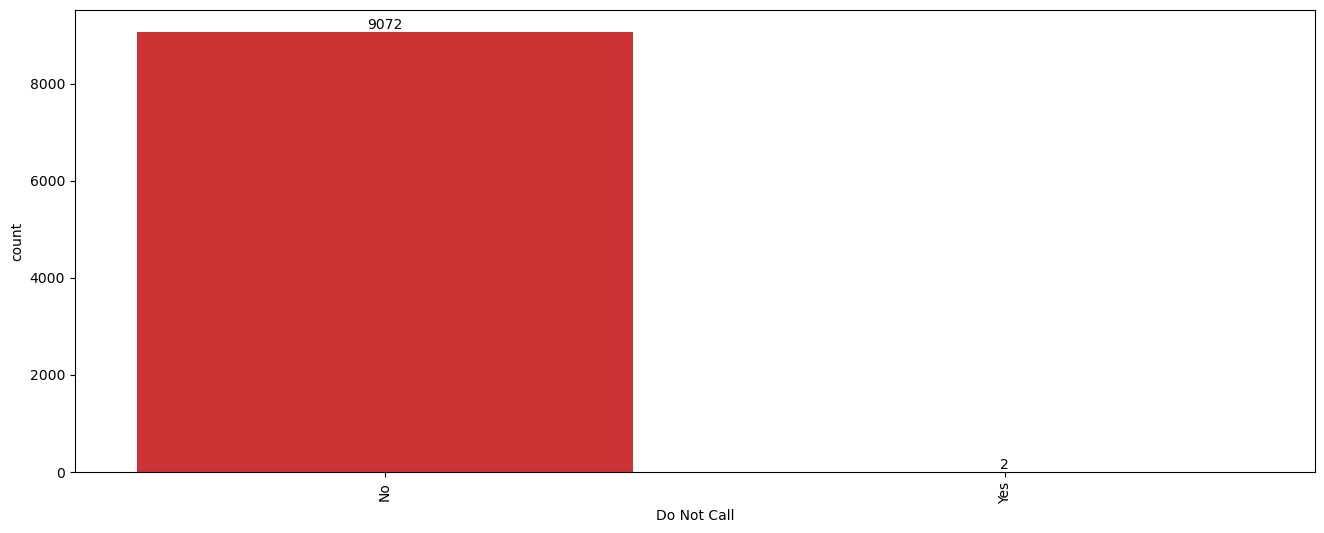

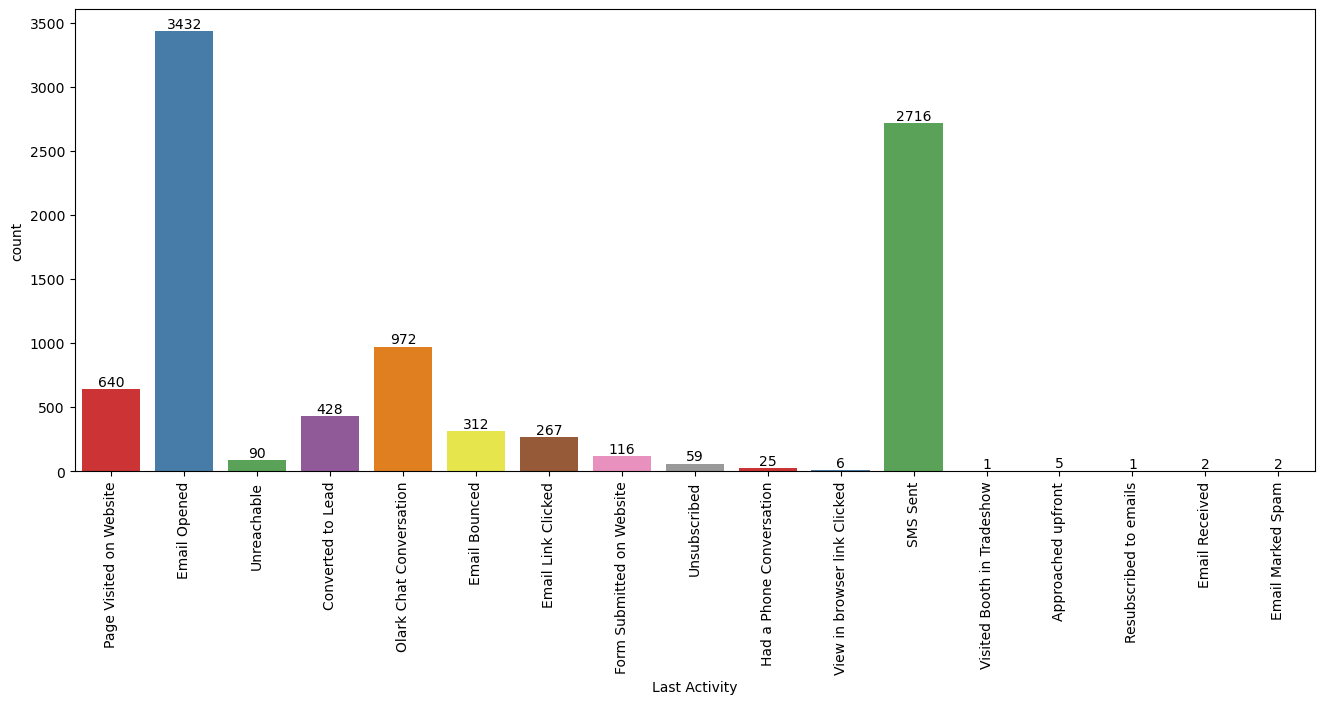

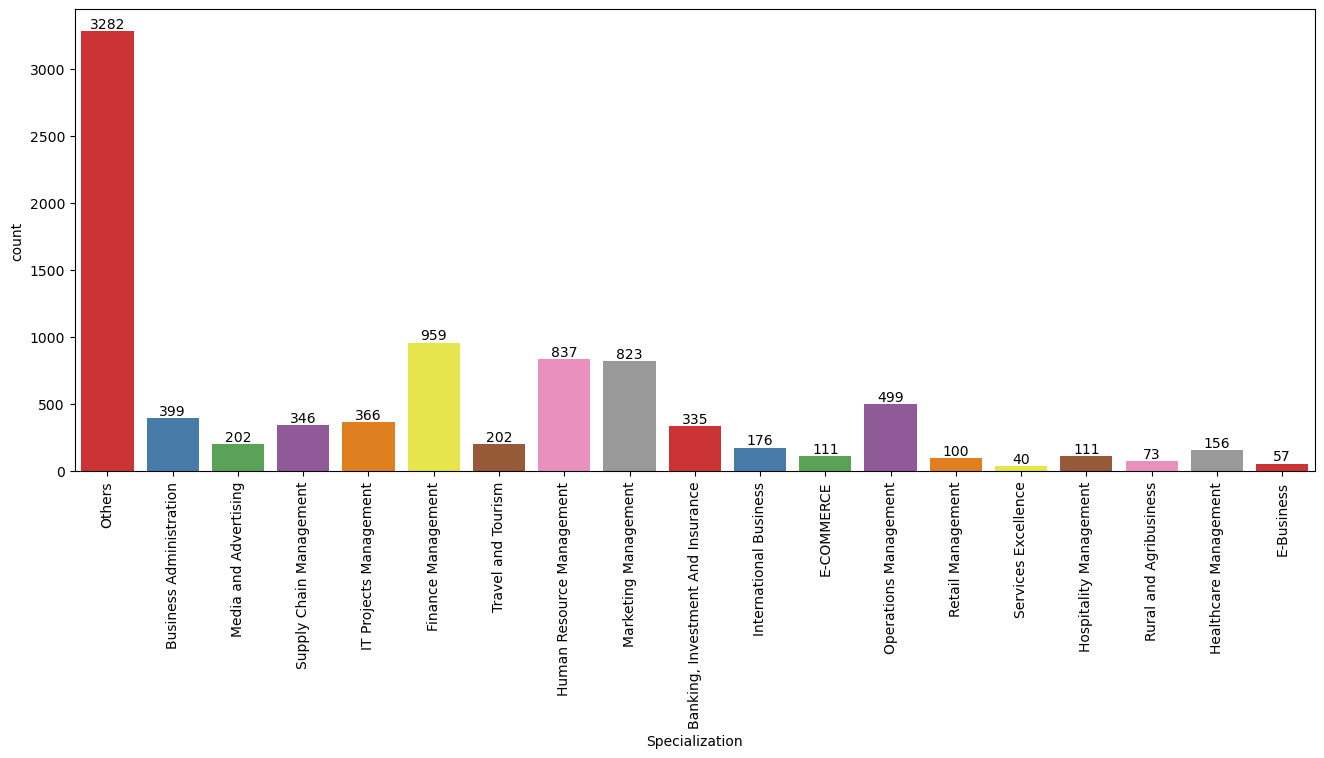

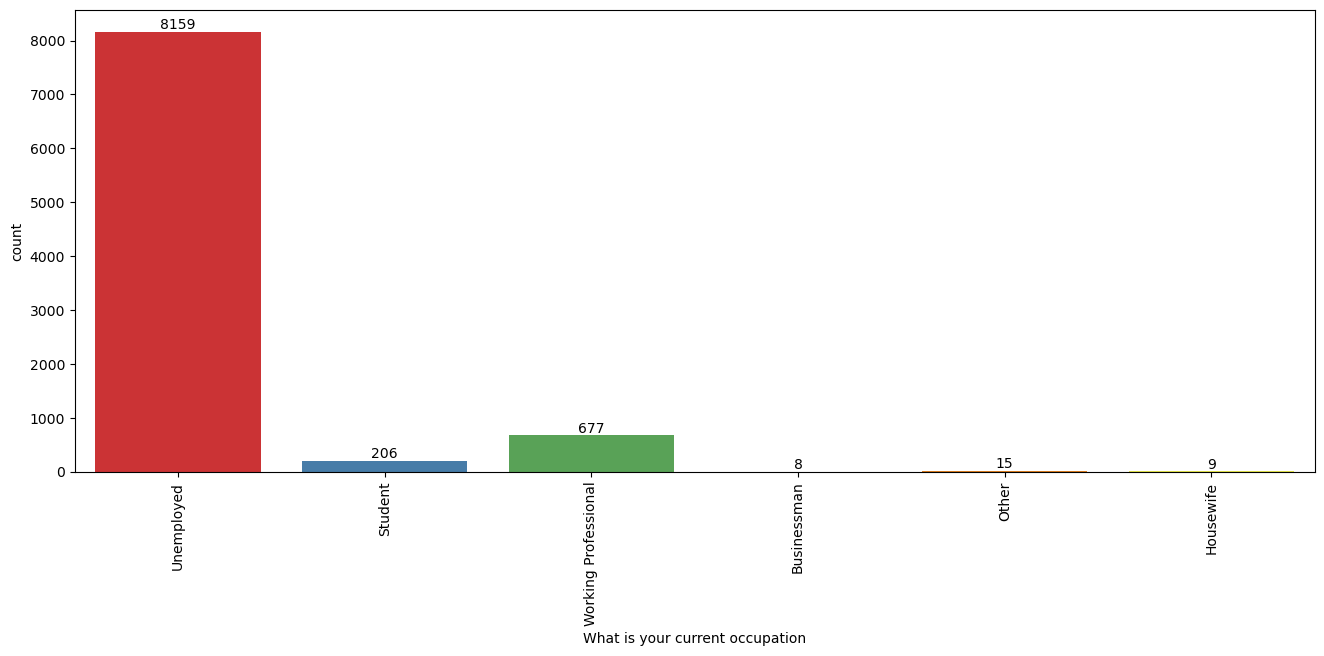

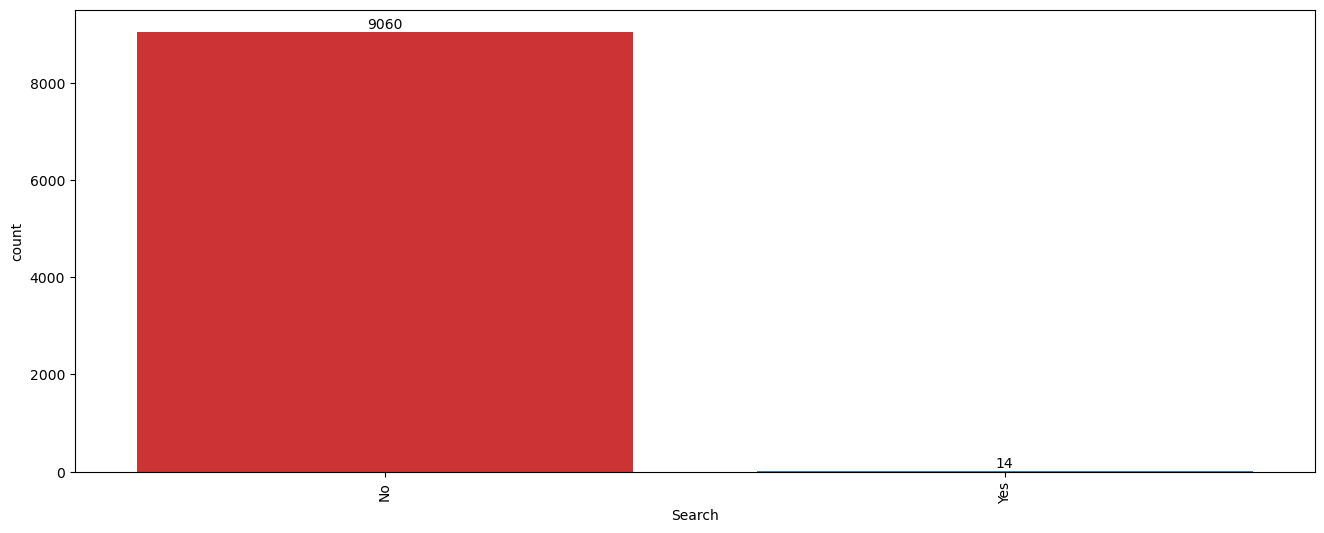

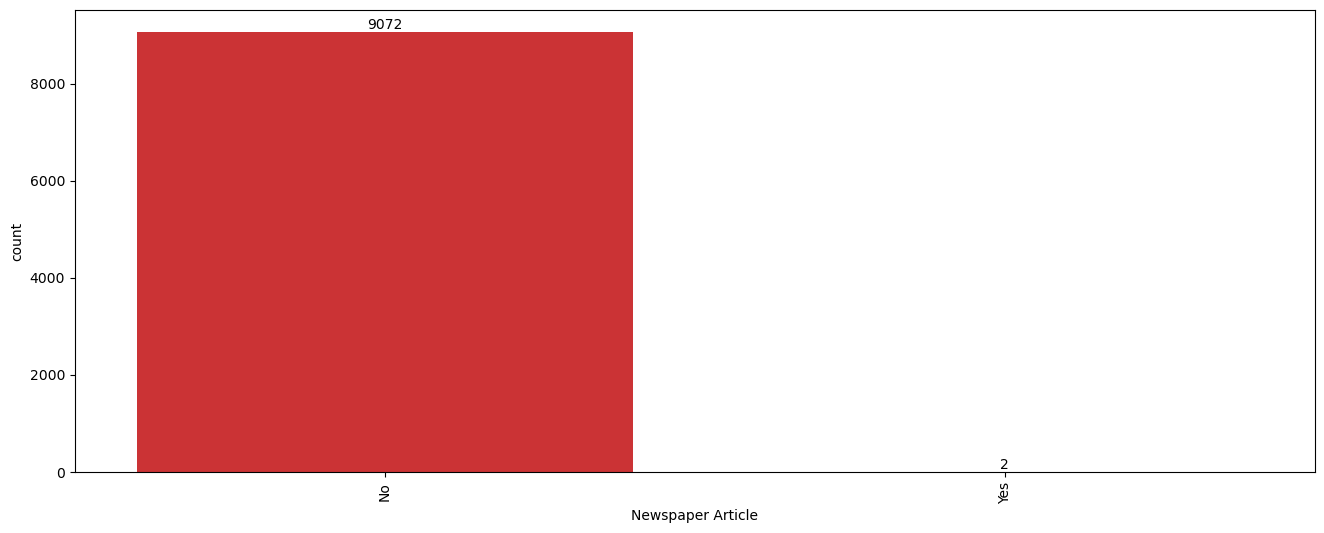

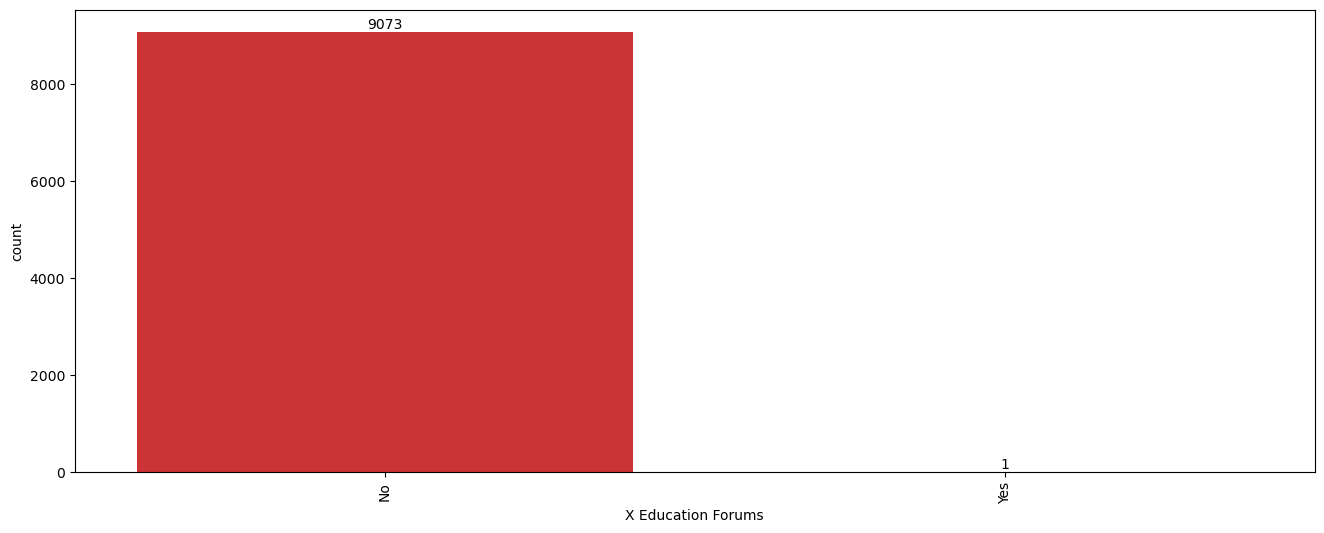

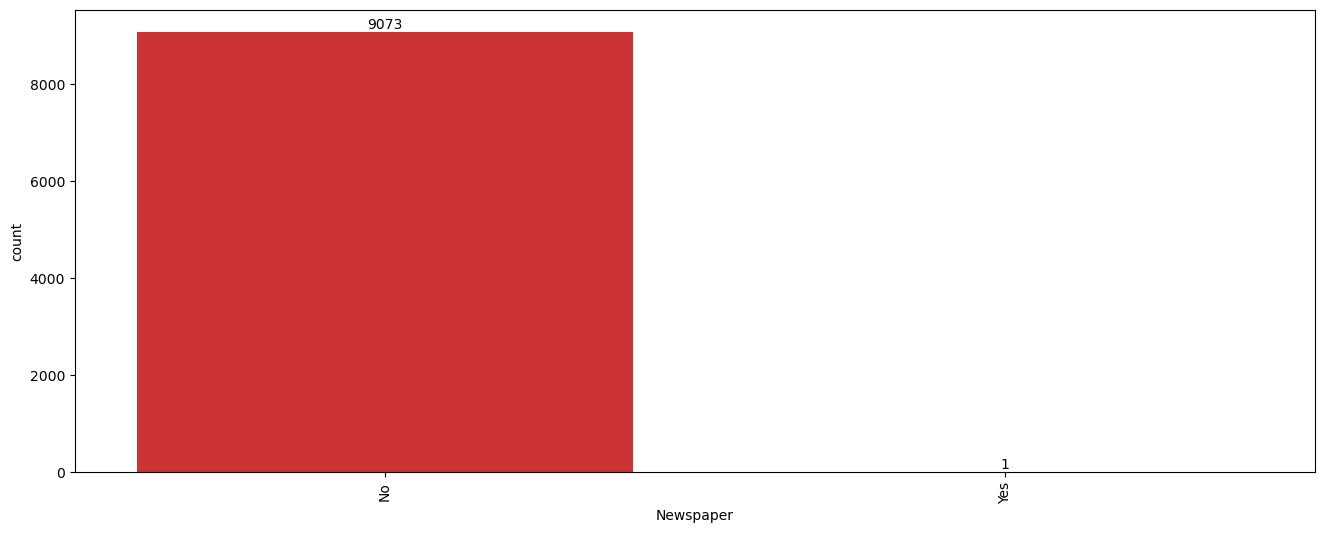

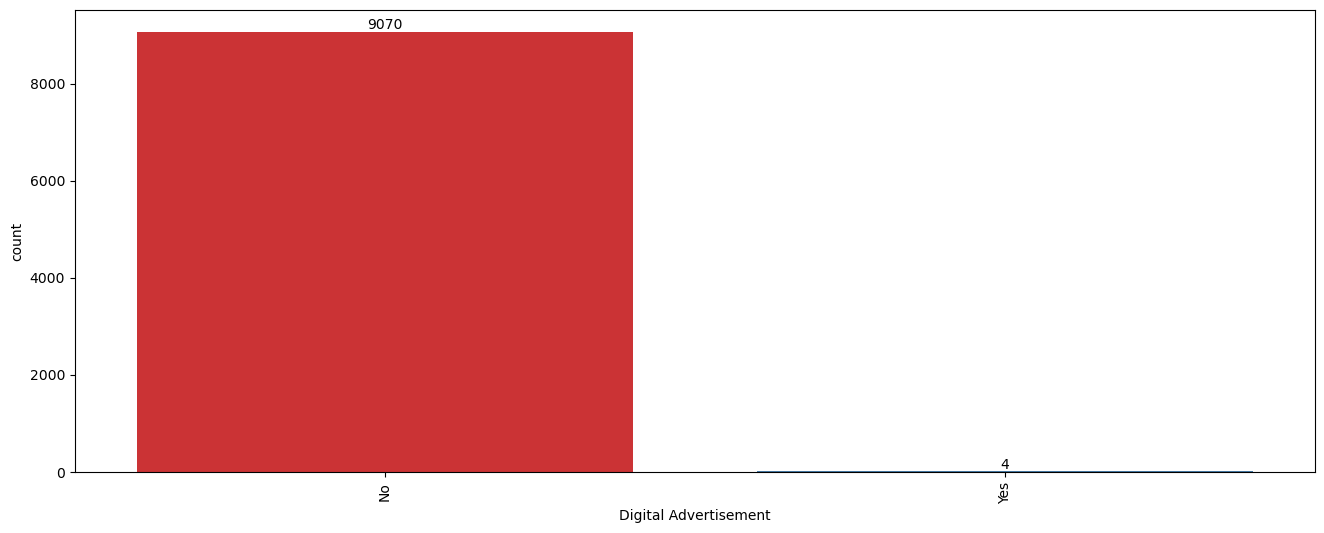

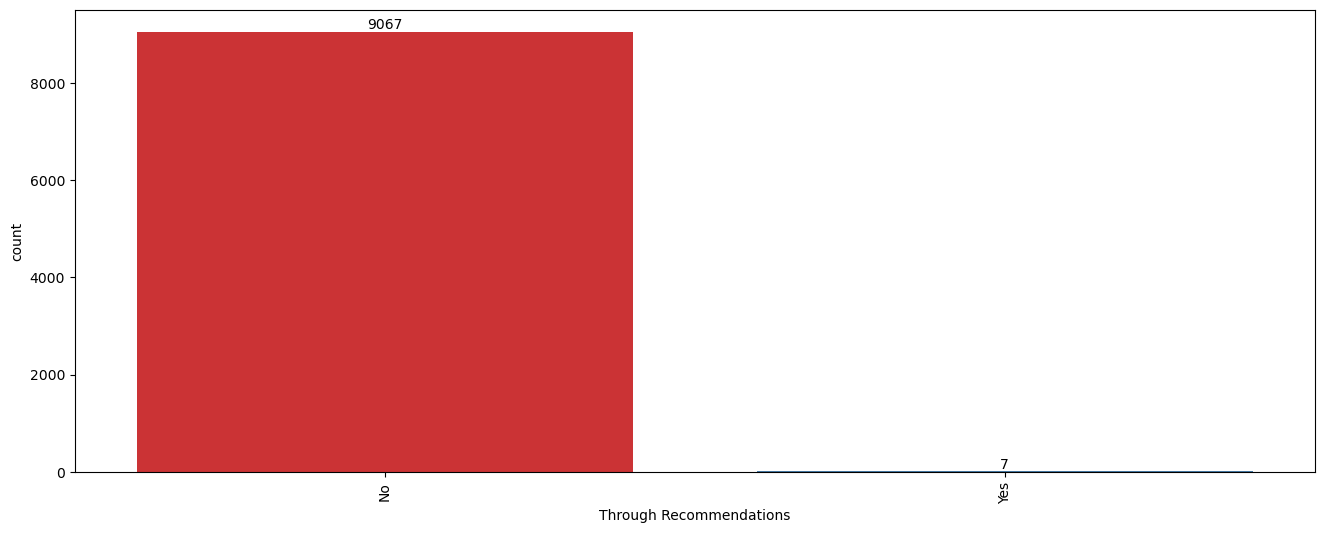

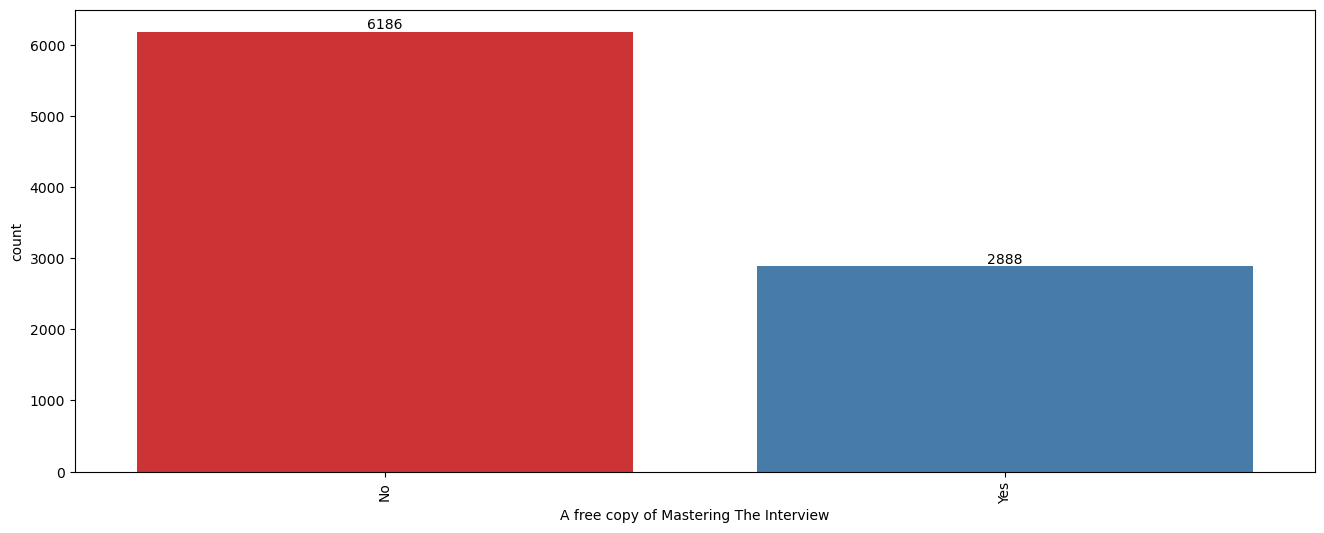

In [33]:
# Visualizing categorical columns
plt.figure(figsize=(16,6))
for i in leads_cat:
    plt.figure(figsize=(16,6))
    val = sns.countplot(x = leads[i], data = leads,palette='Set1')
    plt.xticks(rotation = 90)
    
    for p in val.patches:
        val.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

below mentioned columns are highly skewed,So we will drop the columns
- Do Not Call
- Search
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations

In [34]:
# Dropping the columns
leads.drop(['Do Not Call','Search','Newspaper Article',
            'X Education Forums','Newspaper','Digital Advertisement',
            'Through Recommendations'],axis=1,inplace=True)


In [35]:
leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0         0.00                            0                  0.00   
1         5.00                          674                  2.50   
2         2.00                         1532                  2.00   
3         1.00                          305                  1.00   
4         2.00                         1428                  1.00   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

### <span style="color:MediumBlue">Outlier Analysis for Numerical Columns</span>

In [36]:
# Creating list of  numerical columns
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

In [37]:
def Outliers_check(data,columnList):
    plt.figure(figsize=(20,6))
    k=1
    for j in num_cols:
        plt.subplot(1,3,k)
        sns.boxplot(leads[j],palette='Set2')
        plt.title(j,fontsize=16,color='brown')
        k = k+1
    plt.show()

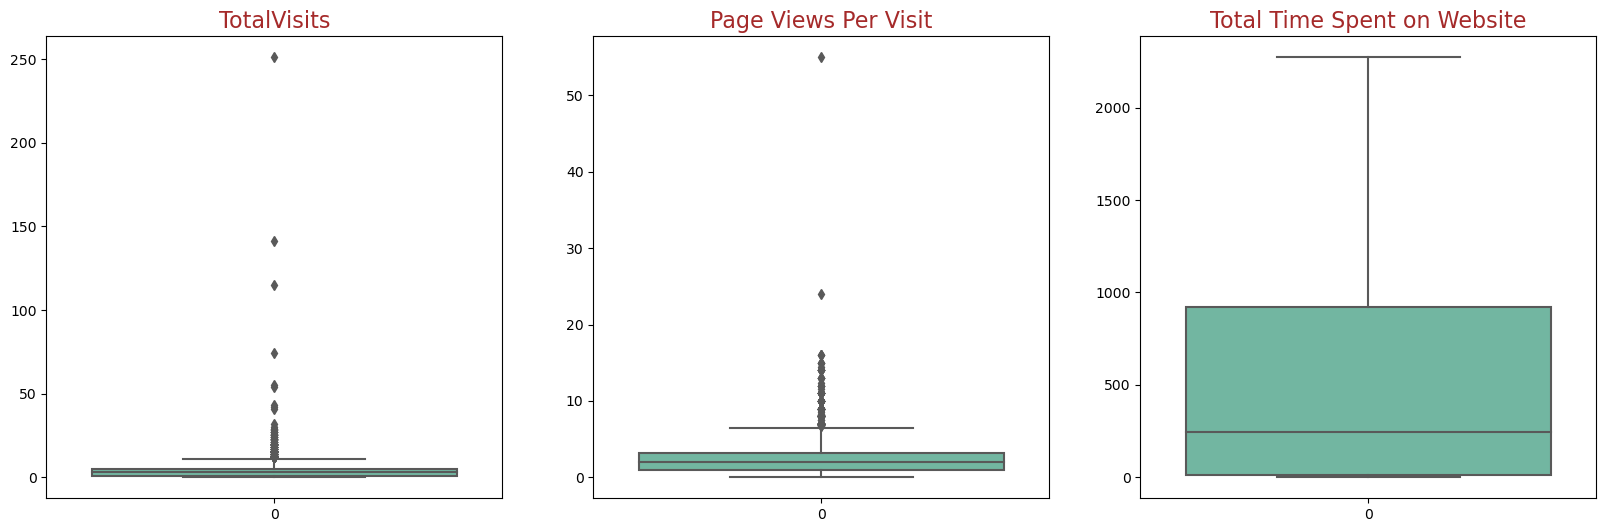

In [38]:
Outliers_check(leads,num_cols)

- "TotalVisits" and "Page Views Per Visit" both contain outliers.

In [39]:
#Checking outliers at different percentiles
leads.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count    9074.00      9074.00                      9074.00   
mean        0.38         3.46                       482.89   
std         0.49         4.86                       545.26   
min         0.00         0.00                         0.00   
10%         0.00         0.00                         0.00   
25%         0.00         1.00                        11.00   
50%         0.00         3.00                       246.00   
75%         1.00         5.00                       922.75   
95%         1.00        10.00                      1557.00   
max         1.00       251.00                      2272.00   

       Page Views Per Visit  
count               9074.00  
mean                   2.37  
std                    2.16  
min                    0.00  
10%                    0.00  
25%                    1.00  
50%                    2.00  
75%                    3.20  
95%                    6.00  
max                   55.00

In [40]:
# Defining UDF to treat outliers

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])
        
        

In [41]:
capping_cols = ["TotalVisits","Page Views Per Visit"]

# UDF 
Outlier_treatment(leads,capping_cols)

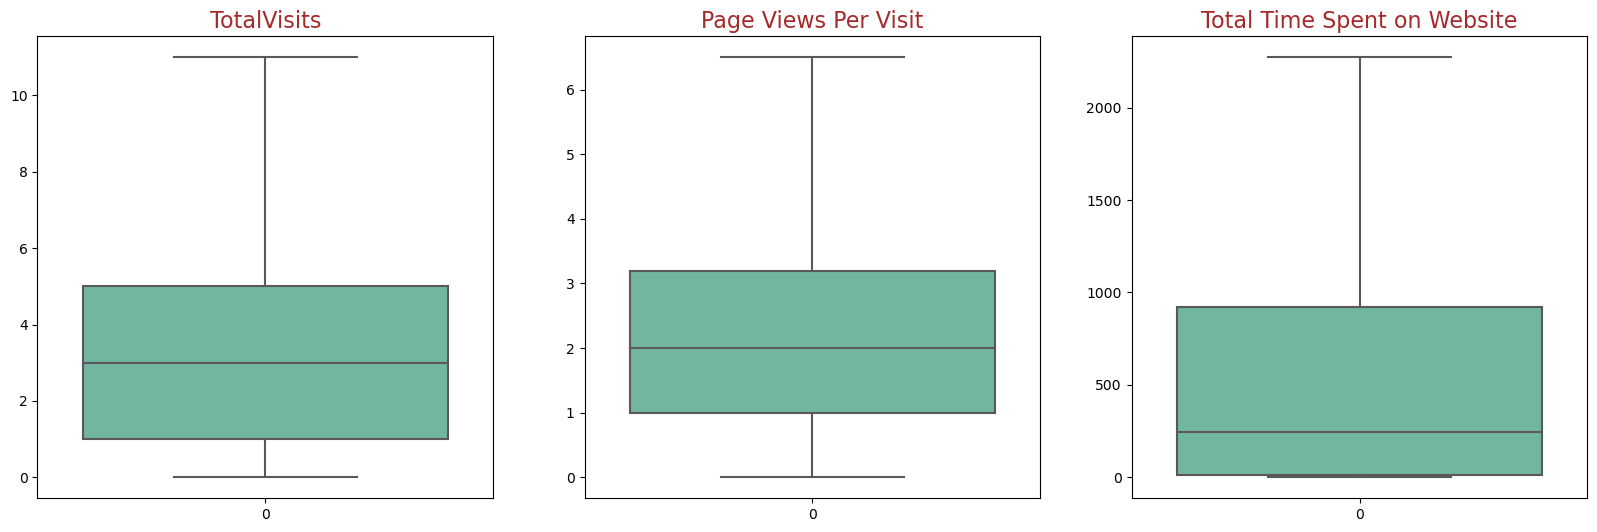

In [42]:
# Checking Boxplot after Outlier Treatment
Outliers_check(leads,num_cols)

In [43]:
# checking different percentiles value after outlier treatment
leads.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count    9074.00      9074.00                      9074.00   
mean        0.38         3.23                       482.89   
std         0.49         2.88                       545.26   
min         0.00         0.00                         0.00   
10%         0.00         0.00                         0.00   
25%         0.00         1.00                        11.00   
50%         0.00         3.00                       246.00   
75%         1.00         5.00                       922.75   
95%         1.00        10.00                      1557.00   
max         1.00        11.00                      2272.00   

       Page Views Per Visit  
count               9074.00  
mean                   2.29  
std                    1.83  
min                    0.00  
10%                    0.00  
25%                    1.00  
50%                    2.00  
75%                    3.20  
95%                    6.00  
max                    6.50

#### Checking data formating for Remaining Columns

In [44]:
leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0         0.00                            0                  0.00   
1         5.00                          674                  2.50   
2         2.00                         1532                  2.00   
3         1.00                          305                  1.00   
4         2.00                         1428                  1.00   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

In [45]:
# Renaming few columns for better formatting
leads.rename(columns={'Total Time Spent on Website': 'Time_Spent'}, inplace=True)
leads.rename(columns={'Page Views Per Visit': 'Page_Views'}, inplace=True)
leads.rename(columns={'What is your current occupation': 'Current_Occupation'}, inplace=True)
leads.rename(columns={'A free copy of Mastering The Interview': 'Free_Copy'}, inplace=True)

In [46]:
leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Time_Spent  Page_Views            Last Activity  \
0         0.00           0        0.00  Page Visited on Website   
1         5.00         674        2.50             Email Opened   
2         2.00        1532        2.00             Email Opened   
3         1.00         305        1.00              Unreachable   
4         2.00        1428        1.00        Converted to Lead   

            Specialization Current_Occupation Free_Copy  
0                   Others         Unemployed        No  
1                   Others         Unemployed        No  
2  Business Administration            Student       Yes  
3    Media and Advertising         Unemployed        No  
4                   Others         Unemployed        No

#### Converting  binary variables (Yes/No to 1/0)

In [47]:
leads['Do Not Email'] = leads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

leads['Free_Copy'] = leads['Free_Copy'].apply(lambda x: 1 if x =='Yes' else 0)

In [48]:
leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Time_Spent  Page_Views            Last Activity  \
0         0.00           0        0.00  Page Visited on Website   
1         5.00         674        2.50             Email Opened   
2         2.00        1532        2.00             Email Opened   
3         1.00         305        1.00              Unreachable   
4         2.00        1428        1.00        Converted to Lead   

            Specialization Current_Occupation  Free_Copy  
0                   Others         Unemployed          0  
1                   Others         Unemployed          0  
2  Business Administration            Student          1  
3    Media and Advertising         Unemployed          0  
4                   Others         Unemployed          0

#### Some of Categorical colums have too many category with low % of value we will merge them to "Others" Category

In [49]:
leads['Lead Source'].value_counts(normalize=True)*100

Google              31.61
Direct Traffic      28.03
Olark Chat          19.32
Organic Search      12.72
Reference            4.88
Welingak Website     1.42
Referral Sites       1.38
Facebook             0.34
bing                 0.07
google               0.06
Click2call           0.04
Press_Release        0.02
Social Media         0.02
Live Chat            0.02
youtubechannel       0.01
testone              0.01
Pay per Click Ads    0.01
welearnblog_Home     0.01
WeLearn              0.01
blog                 0.01
NC_EDM               0.01
Name: Lead Source, dtype: float64

In [50]:
# Grouping low % value to Others
leads['Lead Source'] = leads['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
leads['Lead Source'] = leads['Lead Source'].replace("google","Google")

In [51]:
#Cheaking values % after changes
leads['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                23
Name: Lead Source, dtype: int64

In [52]:
leads['Last Activity'].value_counts(normalize=True)*100

Email Opened                   37.82
SMS Sent                       29.93
Olark Chat Conversation        10.71
Page Visited on Website         7.05
Converted to Lead               4.72
Email Bounced                   3.44
Email Link Clicked              2.94
Form Submitted on Website       1.28
Unreachable                     0.99
Unsubscribed                    0.65
Had a Phone Conversation        0.28
View in browser link Clicked    0.07
Approached upfront              0.06
Email Received                  0.02
Email Marked Spam               0.02
Visited Booth in Tradeshow      0.01
Resubscribed to emails          0.01
Name: Last Activity, dtype: float64

In [53]:
# Grouping low % value to Others
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [54]:
#Cheaking values % after changes
leads['Last Activity'].value_counts(normalize=True)*100

Email Opened                37.82
SMS Sent                    29.93
Olark Chat Conversation     10.71
Page Visited on Website      7.05
Converted to Lead            4.72
Email Bounced                3.44
Email Link Clicked           2.94
Others                       2.10
Form Submitted on Website    1.28
Name: Last Activity, dtype: float64

### <span style="color:MediumBlue">Data Analysis - EDA </span>

#### Checking Data imbalance using Target Variable 'Converted'

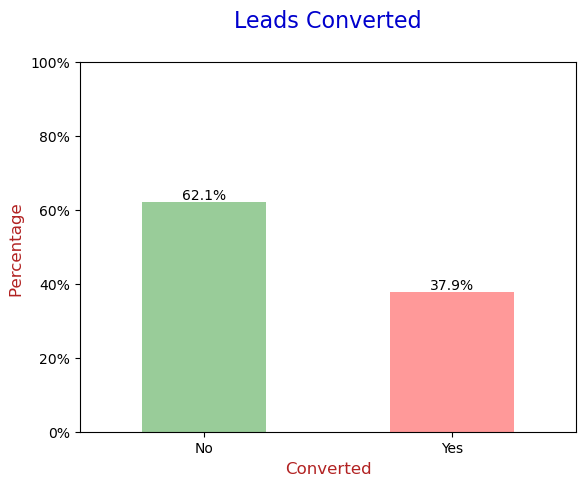

In [55]:
## ploting the results on bar plot

ax=(100*leads["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","red"],alpha=0.4)
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'mediumblue'})
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'firebrick'})
plt.ylabel("Percentage ", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'firebrick'})

#yticks
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

- **37.9% Leads were Converted**

### **Univariate Analysis**

In [56]:
leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Time_Spent  Page_Views            Last Activity  \
0         0.00           0        0.00  Page Visited on Website   
1         5.00         674        2.50             Email Opened   
2         2.00        1532        2.00             Email Opened   
3         1.00         305        1.00                   Others   
4         2.00        1428        1.00        Converted to Lead   

            Specialization Current_Occupation  Free_Copy  
0                   Others         Unemployed          0  
1                   Others         Unemployed          0  
2  Business Administration            Student          1  
3    Media and Advertising         Unemployed          0  
4                   Others         Unemployed          0

In [57]:
#List of categorical columns
cat_vars = ["Lead Origin","Lead Source", "Last Activity","Specialization", "Current_Occupation","Do Not Email","Free_Copy"]

<Figure size 1600x600 with 0 Axes>

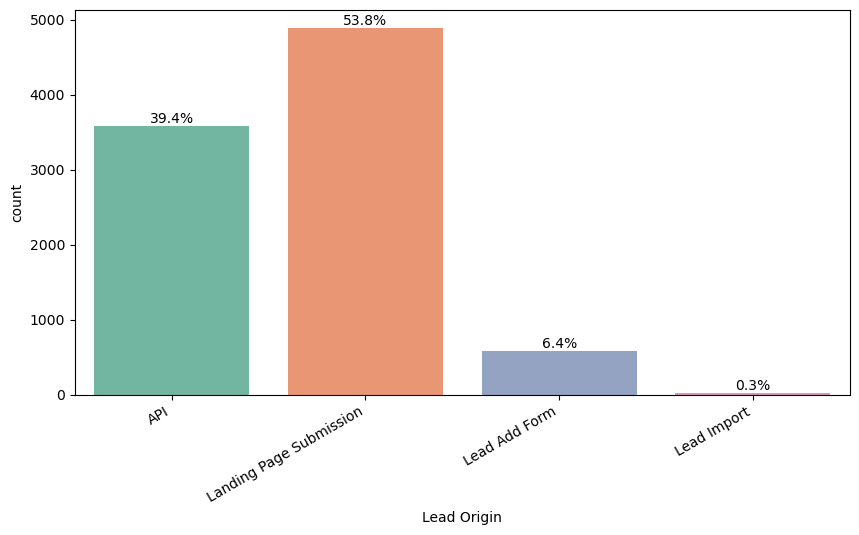

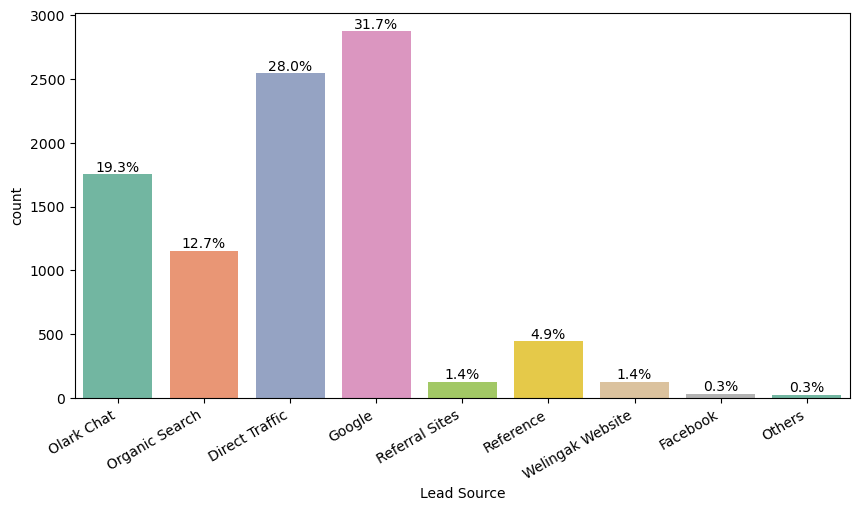

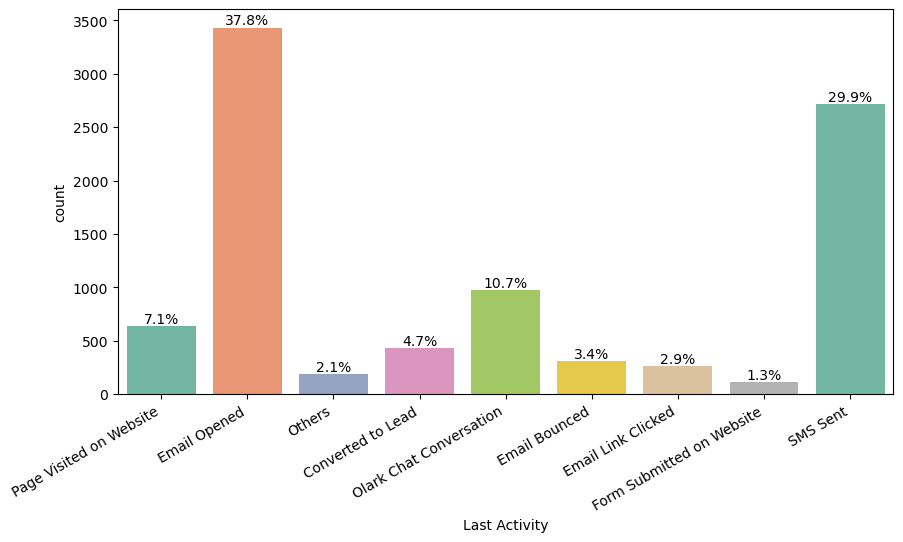

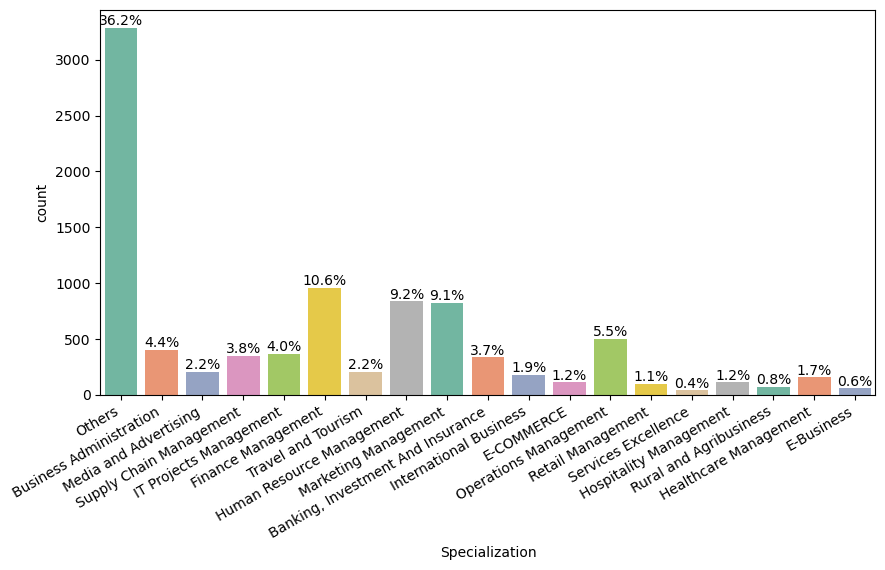

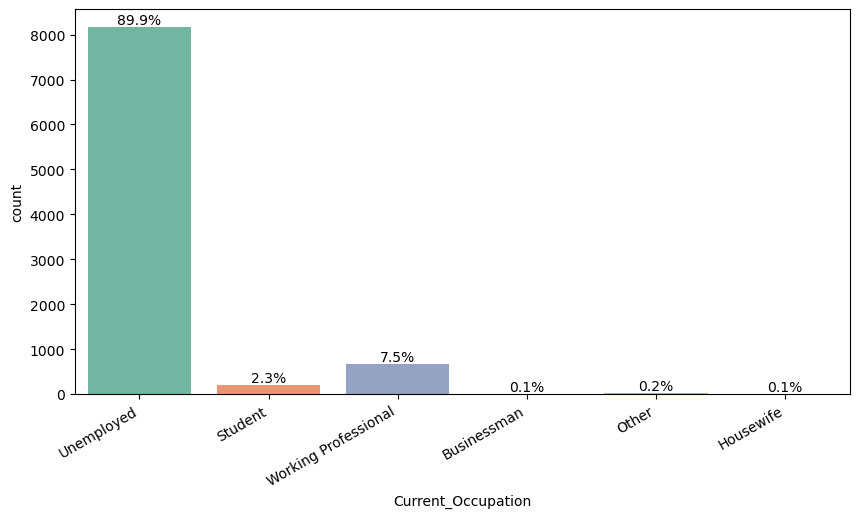

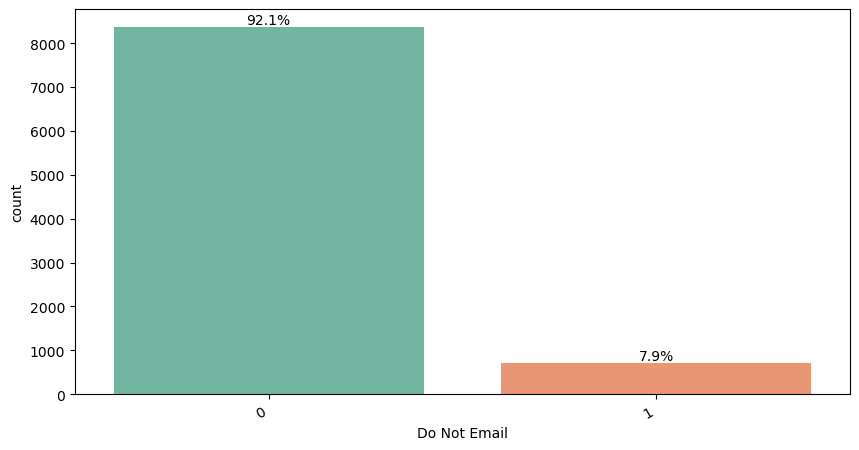

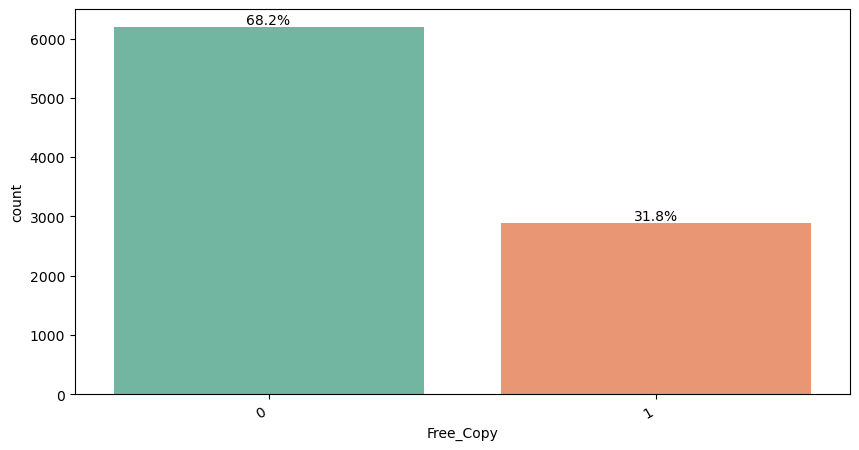

In [58]:
# Visualizing categorical columns
plt.figure(figsize=(16,6))
for i in cat_vars:
    plt.figure(figsize=(10,5))
    val = sns.countplot(x = leads[i], data = leads,palette='Set2')
    total=len(leads[i])
    plt.xticks(rotation=30, ha='right')
    
    for p in val.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        val.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        

**Insights:**


- **Lead Origin:** "Landing Page Submission" identified 53% customers, "API" identified 39%.

- **Lead Source:** 31% Lead source is from Google & 28% is from Direct Traffic.

- **Last Activity:** 29% leads came from SMS Sent & 37% from Email Opened activities.

- **Current_occupation:** 89% of the customers are Unemployed.

- **Do Not Email:** 92% of the people has opted not to be emailed about the course.

- **Free_Copy:** 68% of the people has opted out of free copy of Mastering The Interview.

### Bivariate Analysis of Categorical Variable

<Figure size 1600x600 with 0 Axes>

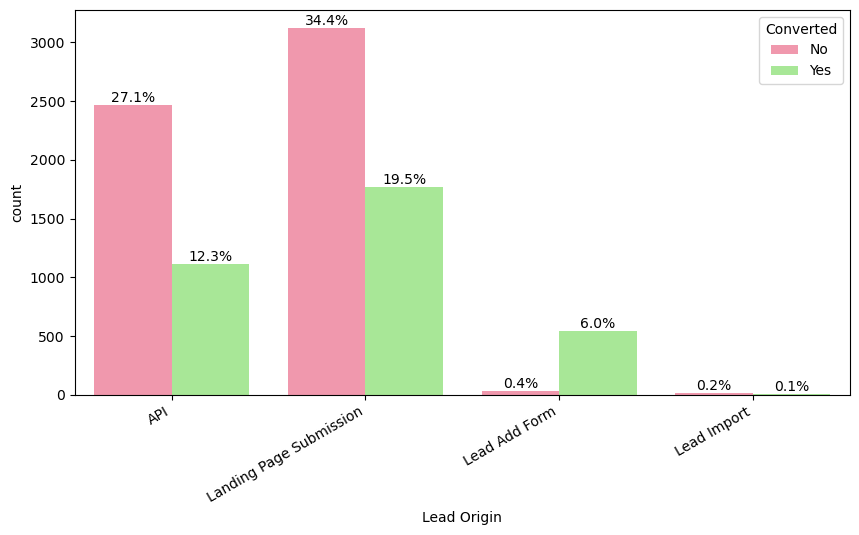

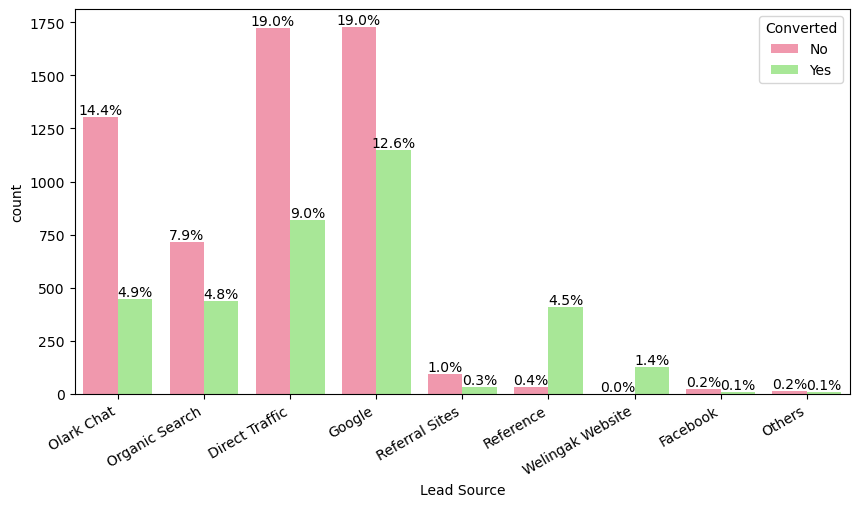

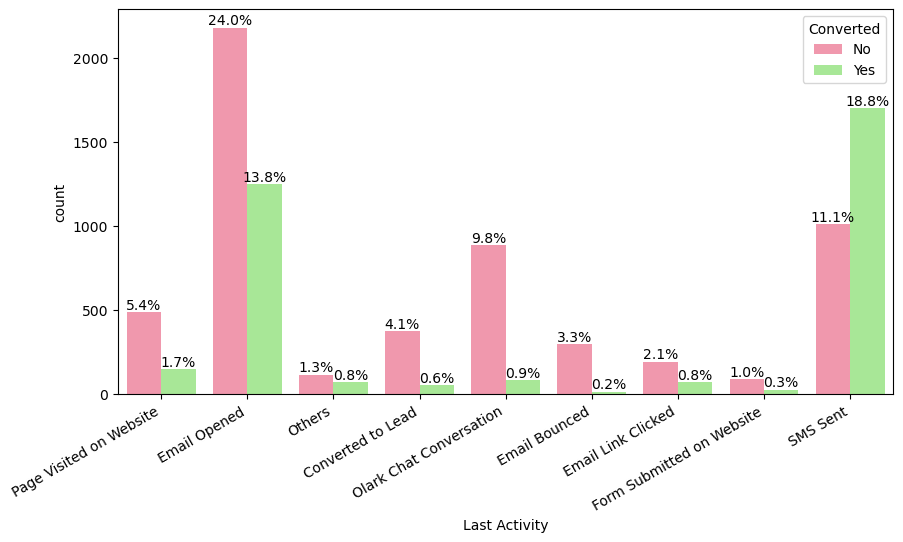

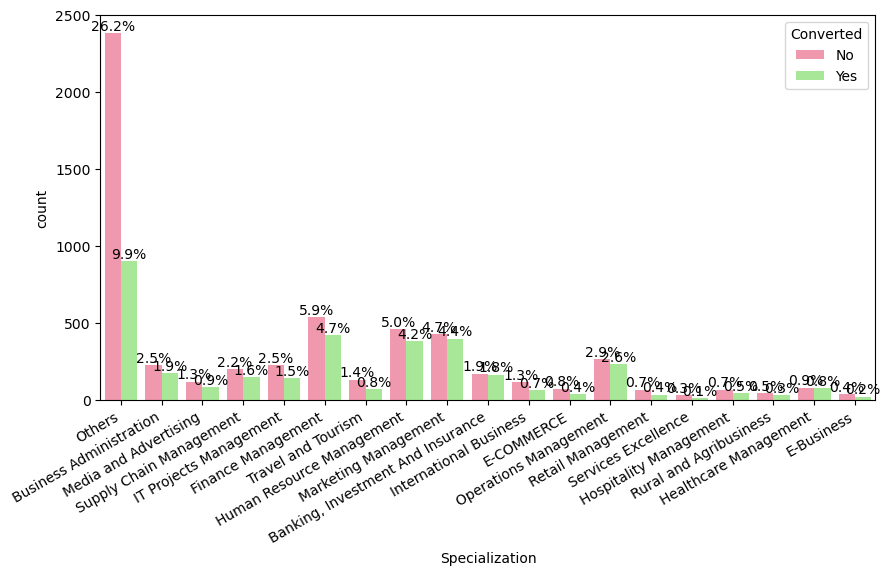

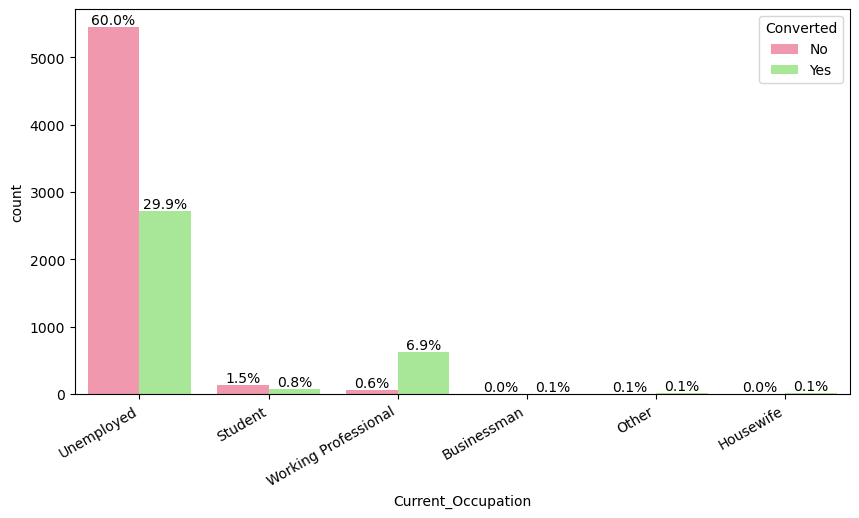

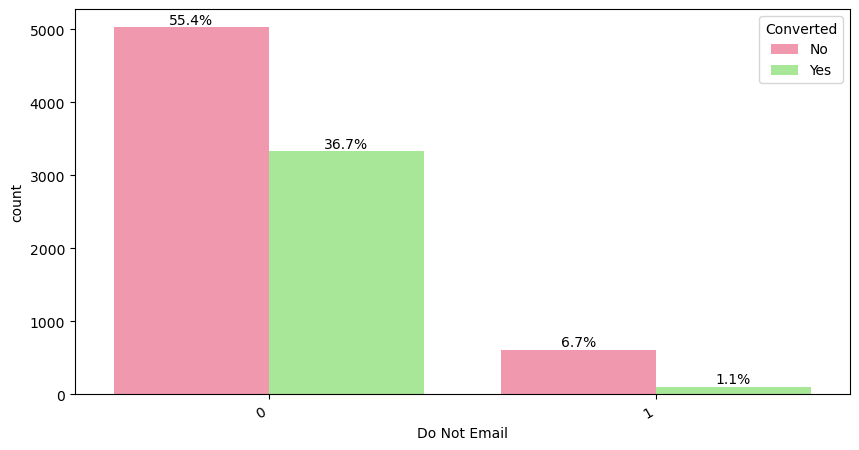

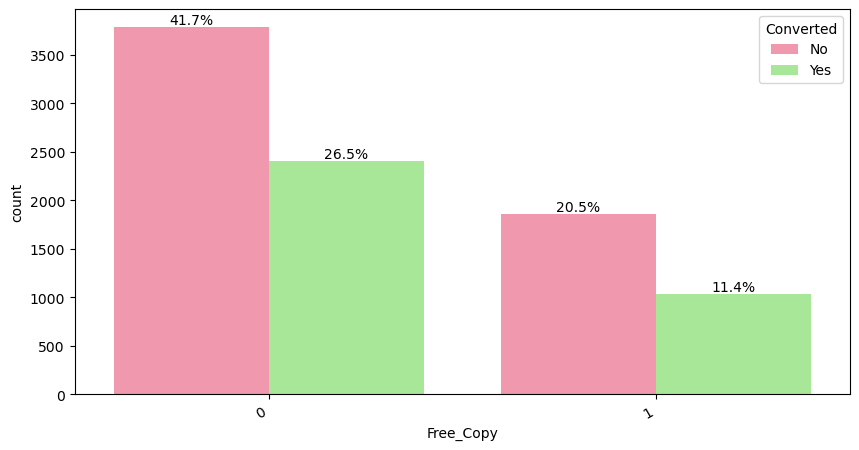

In [59]:
# Visualizing categorical columns
plt.figure(figsize=(16,6))
for i in cat_vars:
    plt.figure(figsize=(10,5))
    val = sns.countplot(x = leads[i], hue='Converted', data = leads, palette="prism_r", alpha=0.46)
    total=len(leads[i])
    plt.xticks(rotation=30, ha='right')
    plt.legend(["No","Yes"],title = "Converted")
    
    for p in val.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        val.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

**Insights:**


- **Lead Origin:** API lead conversion rate is 12% out of 39% and Landing Page Submission conversion rate is 19% out of 53% .


- **Current_occupation:**  Around 90% of the customers are Unemployed with lead conversion rate of 30%. While Working Professional contribute only 7.5% of total customers with almost 90% lead conversion rate.


- **Do Not Email:** 91% of the people has opted not to emailed about the course.


- **Lead Source:** Around 12% of customer were converted out of 31% customers from Google Search , Direct Traffic contributes 29% with 9% Conversion rate ,Organic Search contributes 7.9% with 4.8% Conversion rate ,Reference has highrst coversion Rate of almost 90% but less then 5% customer came through refrence.


- **Last Activity:** 'SMS Sent' has high lead conversion rate 19%, 'Email Opened'  has 14% of lead conversion rate.


- **Specialization:** Marketing Managemt,HR Management,Finance Management shows good lead conversion rate.

### Bivariate Analysis for Numerical Variables

In [60]:
num_cols = ['TotalVisits', 'Page_Views', 'Time_Spent']

<Figure size 1600x400 with 0 Axes>

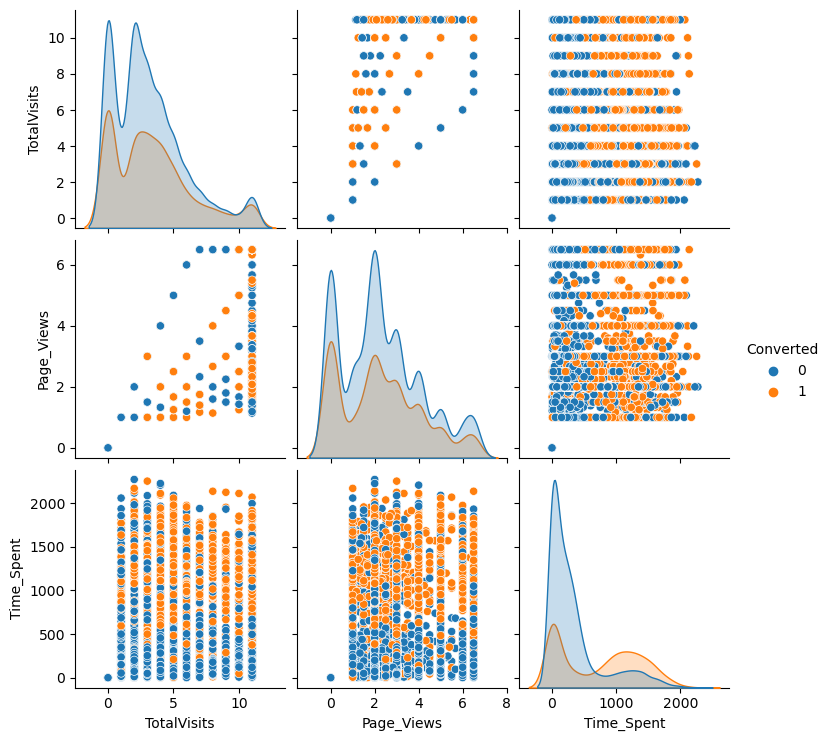

In [61]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=leads,vars=num_cols,hue="Converted")                                  
plt.show()

In [62]:
num_cols_all = ['Converted','TotalVisits', 'Page_Views', 'Time_Spent']

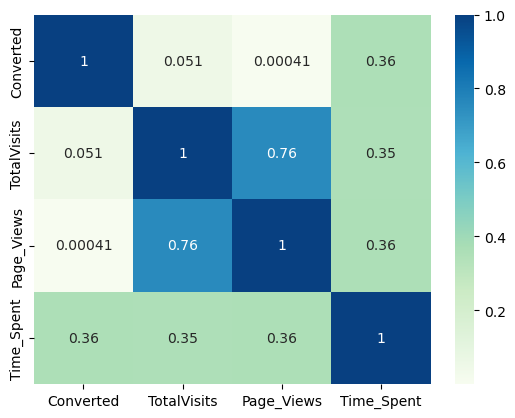

In [63]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=leads[num_cols_all].corr(),cmap="GnBu",annot=True)
plt.show()

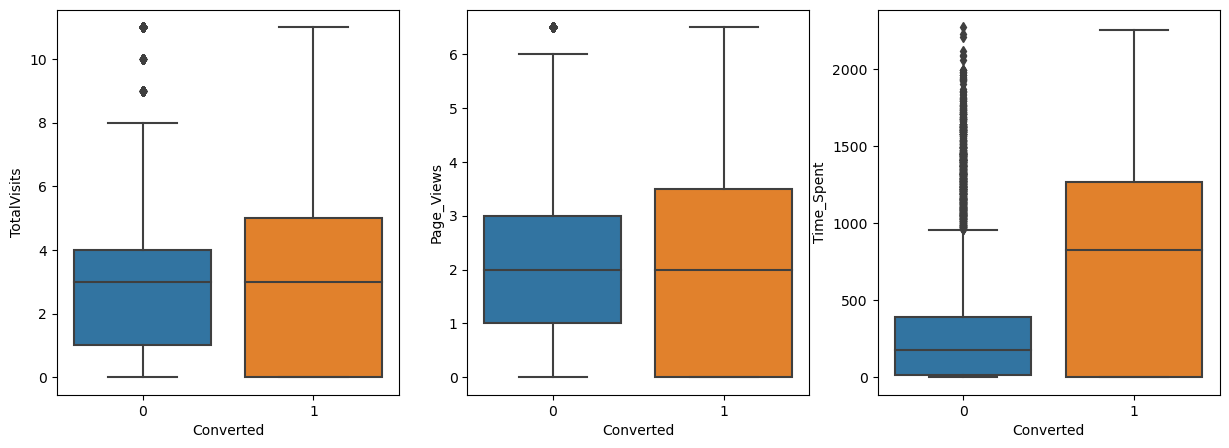

In [64]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page_Views', x = 'Converted', data = leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Time_Spent', x = 'Converted', data = leads)
plt.show()


- Leads who visits the Site more and spend more time on Website have higher chances of Conversion. 

## <span style="color:MediumBlue">Data Preparation </span>

#### Creating Dummy Variables

In [65]:
leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Time_Spent  Page_Views            Last Activity  \
0         0.00           0        0.00  Page Visited on Website   
1         5.00         674        2.50             Email Opened   
2         2.00        1532        2.00             Email Opened   
3         1.00         305        1.00                   Others   
4         2.00        1428        1.00        Converted to Lead   

            Specialization Current_Occupation  Free_Copy  
0                   Others         Unemployed          0  
1                   Others         Unemployed          0  
2  Business Administration            Student          1  
3    Media and Advertising         Unemployed          0  
4                   Others         Unemployed          0

In [66]:

# Creating dummy variable for categorical variables
dummy = pd.get_dummies(leads[["Lead Origin","Lead Source","Last Activity","Specialization","Current_Occupation"]], drop_first=True)

# Merging the dummy with main dataset
leads = pd.concat([leads, dummy], axis=1)

In [67]:
# Dropping the variables for which dummy var are created

leads = leads.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_Occupation"],1)

In [68]:
leads.head()

Do Not Email  Converted  TotalVisits  Time_Spent  Page_Views  Free_Copy  \
0             0          0         0.00           0        0.00          0   
1             0          0         5.00         674        2.50          0   
2             0          1         2.00        1532        2.00          1   
3             0          0         1.00         305        1.00          0   
4             0          1         2.00        1428        1.00          0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     1   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Specializati

In [69]:
leads.shape

(9074, 48)

### Splitting the Data into Training and Test Sets 

In [70]:
#Predictor variables
X = leads.drop('Converted', axis=1)

#Target variables
y = leads["Converted"]


In [71]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [72]:
#Checking the shape after split
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6351, 47) 
y_train: (6351,)


### Feature Scaling

In [73]:
#Rescaling the features
scaler = StandardScaler()
num_cols=X_train.select_dtypes(include=['int64','float64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [74]:
# X-train dataframe after standard scaling
X_train.head()

Do Not Email  TotalVisits  Time_Spent  Page_Views  Free_Copy  \
3009         -0.29        -0.43       -0.16       -0.16       1.47   
1012          3.42        -0.43       -0.54       -0.16      -0.68   
9226         -0.29        -1.12       -0.89       -1.25      -0.68   
4750         -0.29        -0.43        1.64       -0.16      -0.68   
7987         -0.29         0.61        2.02        0.11      -0.68   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3009                                    1                          0   
1012                                    1                          0   
9226                                    0                          0   
4750                                    1                          0   
7987                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
3009                        0                     0                   0   
1012                        0                     0                   0   
9226                        0                     0                   0   
4750                        0                     0                   0   
7987                        0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
3009                       0                           0                   0   
1012                       0                           0                   0   
9226                       1                           0                   0   
4750                       0                           0                   0   
7987                       0                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
3009                      0                           0   
1012                      0                           0   
9226                      0                           0   
4750                      0                           0   
7987                      0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
3009                             0                            0   
1012                             0                            1   
9226                             0                            0   
4750                             0                            0   
7987                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
3009                                 0                           1   
1012                                 0                           0   
9226                                 0                           0   
4750                                 0                           0   
7987                                 0                           0   

      Last Activity_Form Submitted on Website  \
3009                                        0   
1012                                        0   
9226                                        0   
4750                                        0   
7987                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
3009                                      0                     0   
1012                                      0                     0   
9226                                      0                     0   
4750                                      0                     0   
7987                                      0                     0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
3009                                      0                       0   
1012                                      0                       0   
9226                                      0                       1   
4750                                      0    

In [75]:
# Checking the Lead Conversion Rate
LCR = (sum(leads['Converted'])/len(leads['Converted'].index))*100
LCR

37.85541106458012

- We have 38.5% Conversion Rate

### Looking at Correlations

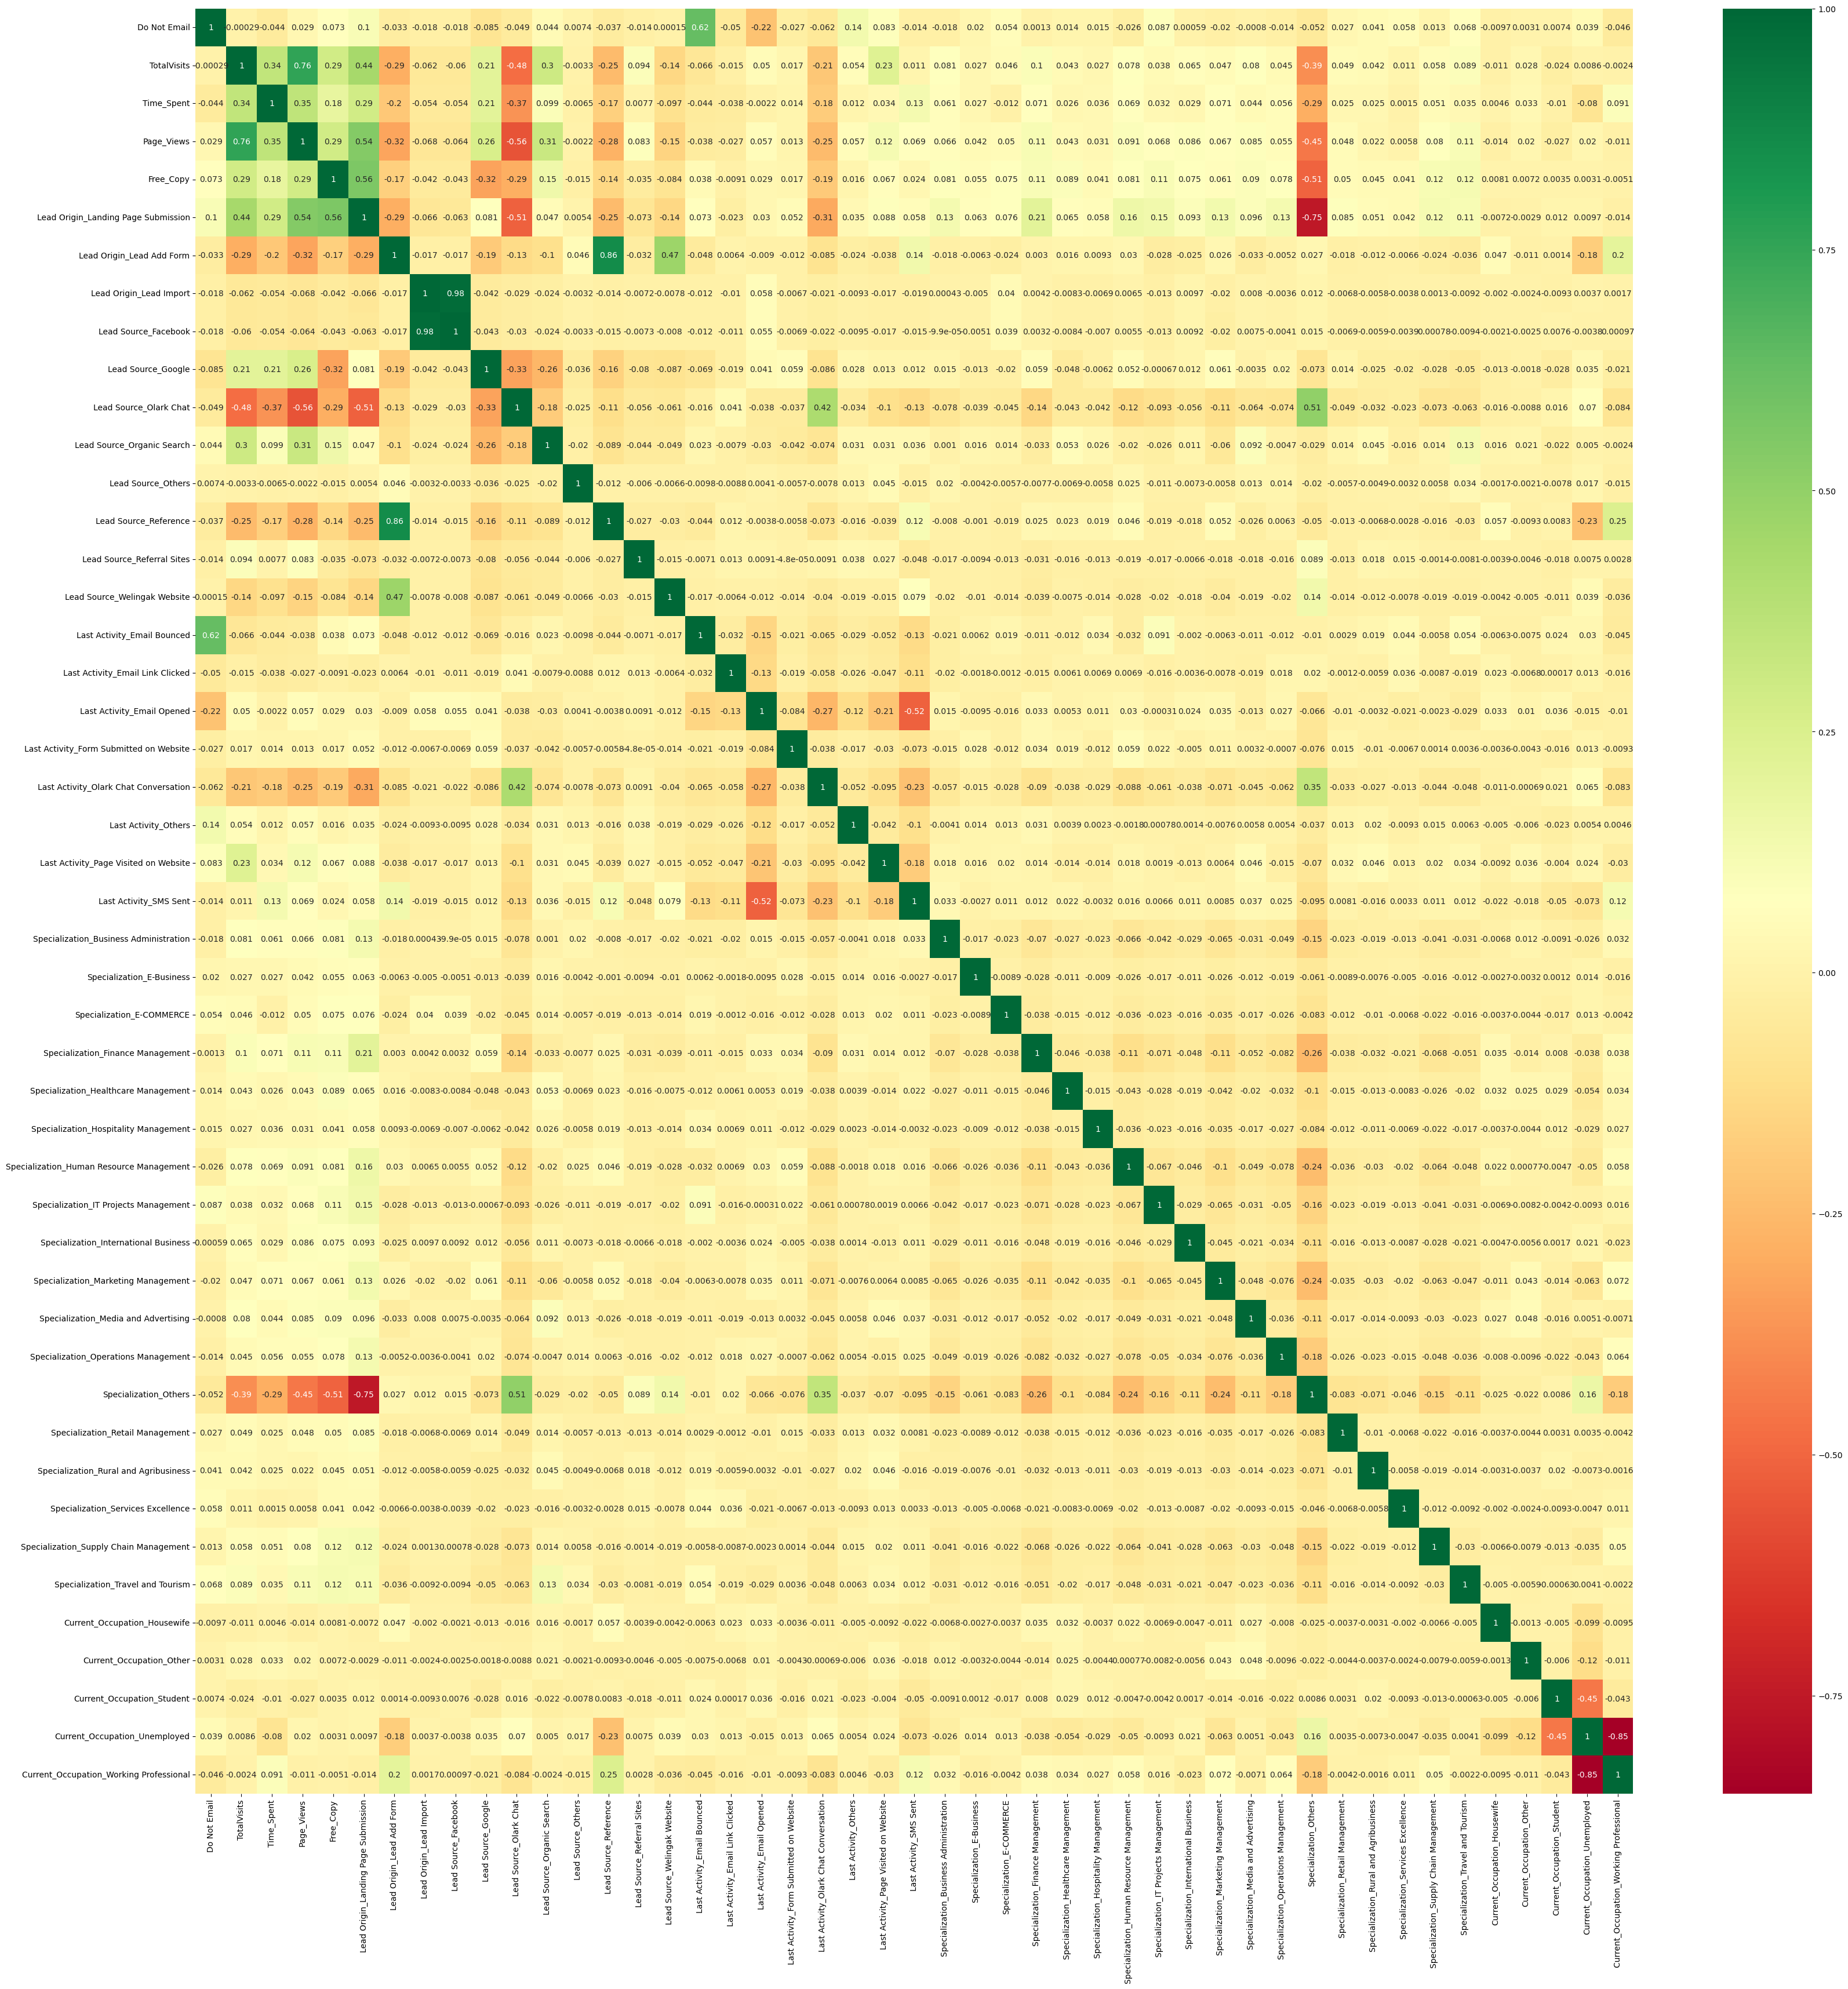

In [76]:
# Checking the variables for correlation
plt.figure(figsize = (40,40))
sns.heatmap(X_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

- **'Lead Origin_Lead Import'** & **'Lead Origin_Lead Add Form'** are highly correlated with each other, So we we will drop this variables.

In [77]:
X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

## Model Building using RFE

In [78]:
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [79]:
##List of variables selected by RFE and their weights
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 6),
 ('TotalVisits', False, 10),
 ('Time_Spent', True, 1),
 ('Page_Views', False, 9),
 ('Free_Copy', False, 20),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 11),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 19),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 21),
 ('Last Activity_Olark Chat Conversation', False, 5),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 17),
 ('Specialization_E-Business', False, 14),
 ('Specialization_E-COMME

In [80]:
#Grouping colums which the RFE model has selected
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Time_Spent', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Others', 'Current_Occupation_Housewife',
       'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional'],
      dtype='object')

In [81]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page_Views', 'Free_Copy',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Sp

In [82]:
#function to calculate VIF of variables

def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### Model-1

In [83]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2677.6
Date:                Tue, 16 Jan 2024   Deviance:                       5355.1
Time:                        20:29:13   Pearson chi2:                 6.87e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3873
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.1896      0.261     -4.558      0.000      -1.701      -0.678
Time_Spent                                  1.1090      0.040     27.847      0.000       1.031       1.187
Lead Origin_Landing Page Submission        -1.2027      0.126     -9.510      0.000      -1.451      -0.955
Lead Source_Olark Chat                      1.0912      0.120      9.103      0.000       0.856       1.326
Lead Source_Others                          0.8563      0.527      1.624      0.104      -0.177       1.890
Lead Source_Reference                       3.2028      0.239     13.404      0.000       2.734       3.671
Lead Source_Welingak Website                5.7113      0.728      7.844      0.000       4.284       7.138
Last Activity_Email Link Clicked            1.0943      0.234      4.678      0.000       0.636       1.553
Last Activity_Email Opened                  1.5171      0.124     12.281      0.000       1.275       1.759
Last Activity_Others                        1.9984      0.233      8.560      0.000       1.541       2.456
Last Activity_Page Visited on Website       0.9353      0.177      5.273      0.000       0.588       1.283
Last Activity_SMS Sent                      2.6380      0.127     20.778      0.000       2.389       2.887
Specialization_Others                      -1.1838      0.124     -9.575      0.000      -1.426      -0.941
Current_Occupation_Housewife               22.3337   1.52e+04      0.001      0.999   -2.98e+04    2.98e+04
Current_Occupation_Unemployed              -0.5038      0.214     -2.358      0.018      -0.923      -0.085
Current_Occupation_Working Professional     2.1820      0.283      7.699      0.000       1.627       2.737
===========================================================================================================
"""

- P-value of **'Current_Occupation_Housewife'** is very high, we will drop this column.

In [84]:
# Dropping 'Current_occupation_Housewife' column
rfe_col=rfe_col.drop("Current_Occupation_Housewife")

### Model-2

In [85]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2680.8
Date:                Tue, 16 Jan 2024   Deviance:                       5361.6
Time:                        20:29:13   Pearson chi2:                 6.89e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3867
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.1091      0.257     -4.314      0.000      -1.613      -0.605
Time_Spent                                  1.1081      0.040     27.851      0.000       1.030       1.186
Lead Origin_Landing Page Submission        -1.2021      0.126     -9.513      0.000      -1.450      -0.954
Lead Source_Olark Chat                      1.0885      0.120      9.083      0.000       0.854       1.323
Lead Source_Others                          0.8557      0.527      1.623      0.105      -0.178       1.889
Lead Source_Reference                       3.2105      0.239     13.446      0.000       2.743       3.679
Lead Source_Welingak Website                5.7113      0.728      7.844      0.000       4.284       7.138
Last Activity_Email Link Clicked            1.0976      0.234      4.700      0.000       0.640       1.555
Last Activity_Email Opened                  1.5206      0.124     12.312      0.000       1.279       1.763
Last Activity_Others                        1.9993      0.233      8.563      0.000       1.542       2.457
Last Activity_Page Visited on Website       0.9339      0.177      5.266      0.000       0.586       1.282
Last Activity_SMS Sent                      2.6386      0.127     20.781      0.000       2.390       2.887
Specialization_Others                      -1.1859      0.124     -9.600      0.000      -1.428      -0.944
Current_Occupation_Unemployed              -0.5852      0.209     -2.799      0.005      -0.995      -0.175
Current_Occupation_Working Professional     2.0994      0.280      7.502      0.000       1.551       2.648
===========================================================================================================
"""

- P-value of **'Lead Source_Others'** is very high, we will drop this column.

In [86]:
# Dropping 'Lead Source_Others' column
rfe_col=rfe_col.drop("Lead Source_Others")

### Model-3

In [87]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2682.1
Date:                Tue, 16 Jan 2024   Deviance:                       5364.1
Time:                        20:29:13   Pearson chi2:                 6.88e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3864
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0996      0.257     -4.279      0.000      -1.603      -0.596
Time_Spent                                  1.1059      0.040     27.827      0.000       1.028       1.184
Lead Origin_Landing Page Submission        -1.2109      0.126     -9.585      0.000      -1.458      -0.963
Lead Source_Olark Chat                      1.0803      0.120      9.027      0.000       0.846       1.315
Lead Source_Reference                       3.2003      0.239     13.408      0.000       2.732       3.668
Lead Source_Welingak Website                5.7037      0.728      7.834      0.000       4.277       7.131
Last Activity_Email Link Clicked            1.0948      0.233      4.689      0.000       0.637       1.552
Last Activity_Email Opened                  1.5204      0.123     12.318      0.000       1.279       1.762
Last Activity_Others                        2.0032      0.233      8.584      0.000       1.546       2.461
Last Activity_Page Visited on Website       0.9432      0.177      5.327      0.000       0.596       1.290
Last Activity_SMS Sent                      2.6368      0.127     20.780      0.000       2.388       2.885
Specialization_Others                      -1.1933      0.124     -9.660      0.000      -1.435      -0.951
Current_Occupation_Unemployed              -0.5813      0.209     -2.781      0.005      -0.991      -0.172
Current_Occupation_Working Professional     2.0981      0.280      7.498      0.000       1.550       2.647
===========================================================================================================
"""

- Model-3 has p-values within the threshold (p-values < 0.05), so we will use the model and check VIFs for any multicollinearity.


In [88]:
# Now checking VIFs for all variables in the Model 3 
get_vif(X_train_sm)

Features   VIF
0                                     const 55.83
1   Current_Occupation_Working Professional  3.78
2             Current_Occupation_Unemployed  3.66
3       Lead Origin_Landing Page Submission  3.32
4                     Specialization_Others  2.95
5                    Last Activity_SMS Sent  2.00
6                Last Activity_Email Opened  1.95
7                    Lead Source_Olark Chat  1.78
8                     Lead Source_Reference  1.48
9     Last Activity_Page Visited on Website  1.33
10                               Time_Spent  1.31
11         Last Activity_Email Link Clicked  1.12
12                     Last Activity_Others  1.11
13             Lead Source_Welingak Website  1.10

- VIF values of all the variable are less than 5, so the model is completly fit.

## <span style="color:MediumBlue">Model Evaluation </span>

In [89]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm)

y_train_pred

3009   0.18
1012   0.12
9226   0.47
4750   0.83
7987   0.88
       ... 
367    0.22
82     0.90
8199   0.88
7077   0.30
5754   0.33
Length: 6351, dtype: float64

In [90]:
y_train_pred

3009   0.18
1012   0.12
9226   0.47
4750   0.83
7987   0.88
       ... 
367    0.22
82     0.90
8199   0.88
7077   0.30
5754   0.33
Length: 6351, dtype: float64

In [91]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17529083, 0.11890638, 0.46509365, 0.82668781, 0.87828162,
       0.68110002, 0.08738439, 0.9552684 , 0.84014836, 0.85811614])

In [92]:
# Creating a dataframe with  predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()


Converted  Converted_Prob  Prospect ID
0          0            0.18         3009
1          0            0.12         1012
2          0            0.47         9226
3          1            0.83         4750
4          1            0.88         7987

- We will start with optimal cutoff Threshold value of Probability of 0.5 and add a new feature predicted in above dataframe using the probabilities

In [93]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


Converted  Converted_Prob  Prospect ID  Predicted
0          0            0.18         3009          0
1          0            0.12         1012          0
2          0            0.47         9226          0
3          1            0.83         4750          1
4          1            0.88         7987          1

## <span style="color:MediumBlue">Confusion Matrix</span>

In [94]:
# Confusion matrix (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3499  406]
 [ 822 1624]]


### Accuracy

In [95]:
# Checking the accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8066446228940324


### Checking Sensitivity and Specificity

In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))


Sensitivity : 0.6639411283728537


In [98]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))


Specificity : 0.8960307298335467


In [99]:
# positive predictive value 
print (TP / float(TP+FP))


0.8


In [100]:
# Negative predictive value
print (TN / float(TN+ FN))


0.809766257810692


### Plotting the ROC Curve

In [101]:
#Function to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [102]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

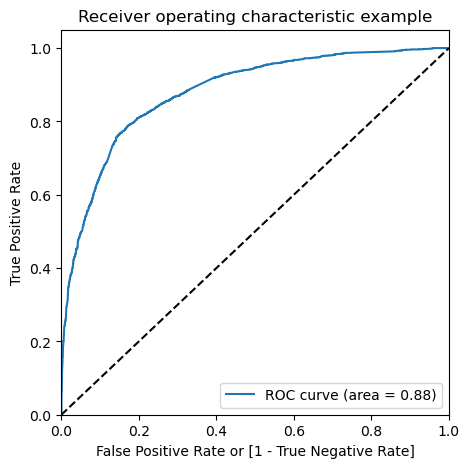

In [103]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

- Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

### Finding Optimal Cutoff Point/ Probability

In [104]:
# probability Calculation in range
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0            0.18         3009          0    1    1    0    0    0   
1          0            0.12         1012          0    1    1    0    0    0   
2          0            0.47         9226          0    1    1    1    1    1   
3          1            0.83         4750          1    1    1    1    1    1   
4          1            0.88         7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    1    0  
4    1    1    1    1    0

In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.39   1.00   0.00
0.10  0.10      0.60   0.97   0.36
0.20  0.20      0.72   0.92   0.59
0.30  0.30      0.79   0.83   0.77
0.40  0.40      0.82   0.77   0.85
0.50  0.50      0.81   0.66   0.90
0.60  0.60      0.79   0.59   0.92
0.70  0.70      0.78   0.51   0.94
0.80  0.80      0.75   0.41   0.97
0.90  0.90      0.71   0.25   0.99


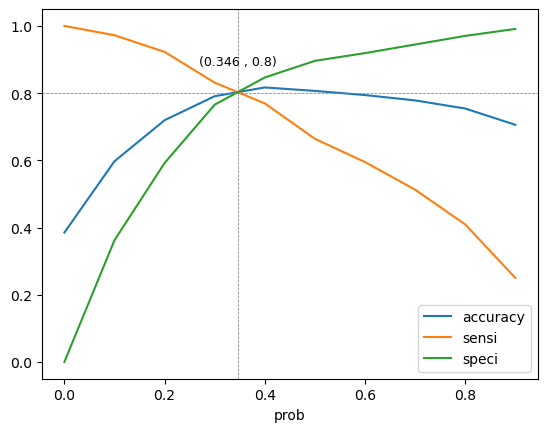

In [106]:
#accuracy sensitivity and specificity curve for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

 - 0.346 is our Optimal cutoff point for probability threshold.

In [107]:
# mapping using Optimal cutoff point 0.346
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.346 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0            0.18         3009                0
1          0            0.12         1012                0
2          0            0.47         9226                1
3          1            0.83         4750                1
4          1            0.88         7987                1

### Calculating all metrics using confusion matrix for Train

In [108]:
# Checking the accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

0.8066446228940324


In [109]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    
    

In [110]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3159  746]
 [ 482 1964]] 

************************************************** 

True Negative                    :  3159
True Positive                    :  1964
False Negative                   :  482
False Positve                    :  746
Model Accuracy                   :  0.8066
Model Sensitivity                :  0.8029
Model Specificity                :  0.809
Model Precision                  :  0.7247
Model Recall                     :  0.8029
Model True Positive Rate (TPR)   :  0.8029
Model False Positive Rate (FPR)  :  0.191


************************************************** 



## Precision and recall tradeoff

In [111]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

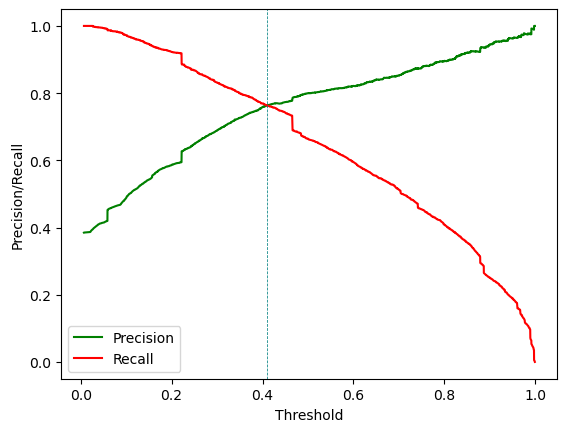

In [112]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

- probability threshold is 0.41

In [113]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [114]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

Converted  Converted_Prob  Prospect ID  final_predicted  \
0          0            0.18         3009                0   
1          0            0.12         1012                0   
2          0            0.47         9226                1   
3          1            0.83         4750                1   
4          1            0.88         7987                1   

   precision_recall_prediction  
0                            0  
1                            0  
2                            1  
3                            1  
4                            1

In [115]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3328  577]
 [ 580 1866]] 

************************************************** 

True Negative                    :  3328
True Positive                    :  1866
False Negative                   :  580
False Positve                    :  577
Model Accuracy                   :  0.8178
Model Sensitivity                :  0.7629
Model Specificity                :  0.8522
Model Precision                  :  0.7638
Model Recall                     :  0.7629
Model True Positive Rate (TPR)   :  0.7629
Model False Positive Rate (FPR)  :  0.1478


************************************************** 



- As we can see in above metrics when we used precision-recall threshold cut-off of 0.41 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 75%, but we need it close to 80% as the Business Objective.
- 80% for the metrics we are getting with the sensitivity-specificity cut-off threshold of 0.345. So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.

### Adding Lead Score Feature to Training dataframe

In [116]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0            0.18         3009                0          18
1          0            0.12         1012                0          12
2          0            0.47         9226                1          47
3          1            0.83         4750                1          83
4          1            0.88         7987                1          88

### Making Predictions on test set

- Scaling Test dataset

In [117]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

Time_Spent  Lead Origin_Landing Page Submission  Lead Source_Olark Chat  \
3271       -0.60                                    0                       0   
1490        1.89                                    1                       0   
7936       -0.75                                    0                       0   
4216       -0.89                                    0                       0   
3830       -0.59                                    1                       0   

      Lead Source_Reference  Lead Source_Welingak Website  \
3271                      0                             0   
1490                      0                             0   
7936                      0                             0   
4216                      1                             0   
3830                      0                             0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
3271                                 0                           1   
1490                                 0                           1   
7936                                 0                           1   
4216                                 0                           1   
3830                                 0                           1   

      Last Activity_Others  Last Activity_Page Visited on Website  \
3271                     0                                      0   
1490                     0                                      0   
7936                     0                                      0   
4216                     0                                      0   
3830                     0                                      0   

      Last Activity_SMS Sent  Specialization_Others  \
3271                       0                      1   
1490                       0                      0   
7936                       0                      1   
4216                       0                      0   
3830                       0                      0   

      Current_Occupation_Unemployed  Current_Occupation_Working Professional  
3271                              1                                        0  
1490                              0                                        1  
7936                              1                                        0  
4216                              0                                        0  
3830                              1                                        0

In [118]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2723, 14)

In [119]:
# making prediction using model 4 (final model)
y_test_pred = result.predict(X_test_sm)

In [120]:
# top 10 columns
y_test_pred[:10]

3271   0.12
1490   0.97
7936   0.10
4216   0.93
3830   0.12
1800   0.62
6507   0.27
4821   0.27
4223   0.88
4714   0.47
dtype: float64

In [121]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
3271 0.12
1490 0.97
7936 0.10
4216 0.93
3830 0.12

In [122]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
3271          0
1490          1
7936          0
4216          1
3830          0

In [123]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

Converted  Prospect ID    0
0          0         3271 0.12
1          1         1490 0.97
2          0         7936 0.10
3          1         4216 0.93
4          0         3830 0.12

In [124]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         3271          0            0.12
1         1490          1            0.97
2         7936          0            0.10
3         4216          1            0.93
4         3830          0            0.12

In [125]:
# taking sensitivity-specificity method at 0.346 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.346 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         3271          0            0.12                0
1         1490          1            0.97                1
2         7936          0            0.10                0
3         4216          1            0.93                1
4         3830          0            0.12                0

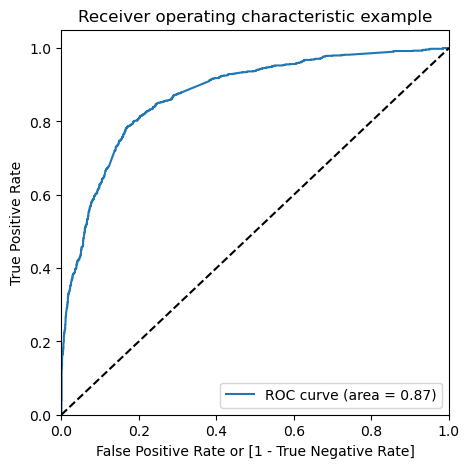

In [126]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

- Area under ROC curve is 0.87 out of 1 which indicates a good predictive model

### Test set Model Evaluation

In [127]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1414  320]
 [ 201  788]] 

************************************************** 

True Negative                    :  1414
True Positive                    :  788
False Negative                   :  201
False Positve                    :  320
Model Accuracy                   :  0.8087
Model Sensitivity                :  0.7968
Model Specificity                :  0.8155
Model Precision                  :  0.7112
Model Recall                     :  0.7968
Model True Positive Rate (TPR)   :  0.7968
Model False Positive Rate (FPR)  :  0.1845


************************************************** 



- These matrics are very close to train set, so out final model is performing with good on both Train & Test set

In [128]:
# features and their coefficicent from final model
parameters=result.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website               5.70
Lead Source_Reference                      3.20
Last Activity_SMS Sent                     2.64
Current_Occupation_Working Professional    2.10
Last Activity_Others                       2.00
Last Activity_Email Opened                 1.52
Time_Spent                                 1.11
Last Activity_Email Link Clicked           1.09
Lead Source_Olark Chat                     1.08
Last Activity_Page Visited on Website      0.94
Current_Occupation_Unemployed             -0.58
const                                     -1.10
Specialization_Others                     -1.19
Lead Origin_Landing Page Submission       -1.21
dtype: float64

- A high positive coefficient indicates that a variable has a stronger influence on predicting the probability of leads conversion.


### Adding Lead Score Feature to Test dataframe 

In [129]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         3271          0            0.12                0          12
1         1490          1            0.97                1          97
2         7936          0            0.10                0          10
3         4216          1            0.93                1          93
4         3830          0            0.12                0          12

## <span style="color:MediumBlue">💡Final Result Comparison</span>

### <strong><span style="color:purple">Train Data Set:</span></strong>            

- <strong><span style="color:Green">Accuracy:</span></strong> 80.66%

- <strong><span style="color:Green">Sensitivity:</span></strong> 80.29%

- <strong><span style="color:Green">Specificity:</span></strong> 80.90%

### <strong><span style="color:purple">Test Data Set:</span></strong> 

- <strong><span style="color:Green">Accuracy:</span></strong> 80.87%

- <strong><span style="color:Green">Sensitivity:</span></strong> 79.68%

- <strong><span style="color:Green">Specificity:</span></strong> 81.55%

The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

- The Optimal cutoff probability point is 0.346,Converted probability greater than 0.346 will be predicted as Converted lead.
- The model achieved a sensitivity of 80.29% in the train set and 79.68% in the test set.
- The model also achieved an accuracy of 80.66%.
